### Import Library

In [1]:
import torch
import matplotlib.pyplot as plt
from Utils import *
from Model import *

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data_type_list = ['ADNI', 'ROSMAP', 'BRCA', 'KIRC', 'Colon']
mp_list = [1000, 2000, 3000]
model_list = ['MMMF-Over-GS', 'MMMF-Over', 'MMMF-GS', 'MMMF']

### Check Classification Performance

In [2]:
for model in model_list:
    print('Model: {}'.format(model))
    for data_type in data_type_list:
        for mp in mp_list:
            print('Data Type: {}, MP: {}'.format(data_type, mp))
            _ = check_classification_performance(data_type, mp, model, device)
    print('\n')

Model: MMMF-Over-GS
Data Type: ADNI, MP: 1000
Reproduction
Test BA: 0.729±0.060, F1: 0.615±0.112, AUC: 0.927±0.022, MCC: 0.576±0.108
Data Type: ADNI, MP: 2000
Reproduction
Test BA: 0.712±0.034, F1: 0.592±0.066, AUC: 0.908±0.031, MCC: 0.572±0.067
Data Type: ADNI, MP: 3000
Reproduction
Test BA: 0.772±0.090, F1: 0.684±0.149, AUC: 0.901±0.048, MCC: 0.659±0.148
Data Type: ROSMAP, MP: 1000
Reproduction
Test BA: 0.700±0.032, F1: 0.759±0.033, AUC: 0.786±0.014, MCC: 0.419±0.067
Data Type: ROSMAP, MP: 2000
Reproduction
Test BA: 0.692±0.024, F1: 0.744±0.031, AUC: 0.775±0.025, MCC: 0.396±0.053
Data Type: ROSMAP, MP: 3000
Reproduction
Test BA: 0.686±0.044, F1: 0.744±0.031, AUC: 0.772±0.020, MCC: 0.383±0.085
Data Type: BRCA, MP: 1000
Reproduction
Test BA: 0.697±0.053, F1: 0.713±0.052, AUC: 0.928±0.009, MCC: 0.642±0.054
Data Type: BRCA, MP: 2000
Reproduction
Test BA: 0.697±0.036, F1: 0.722±0.045, AUC: 0.935±0.008, MCC: 0.650±0.057
Data Type: BRCA, MP: 3000
Reproduction
Test BA: 0.715±0.024, F1: 0.736

### Visualization ROC Curve & PR-Curve

**Binary Class - ADNI, ROSMAP, KIRC, Colon - AUC curve**

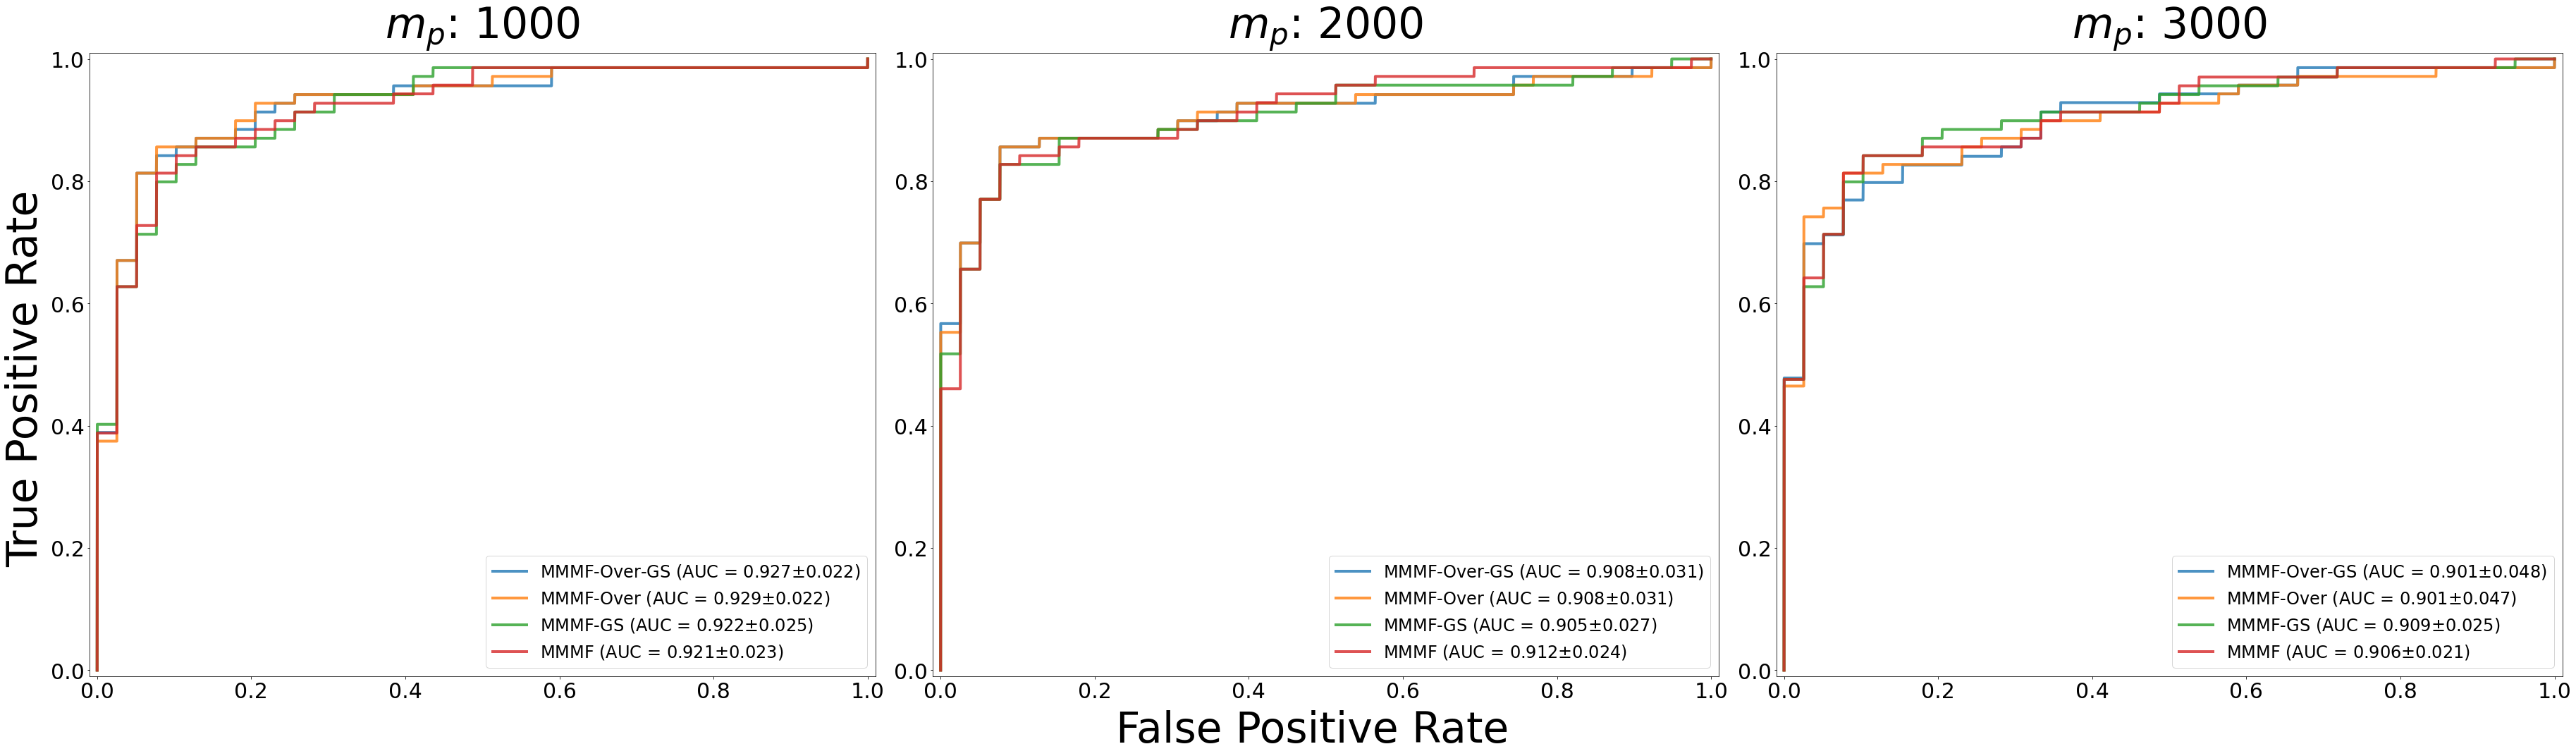

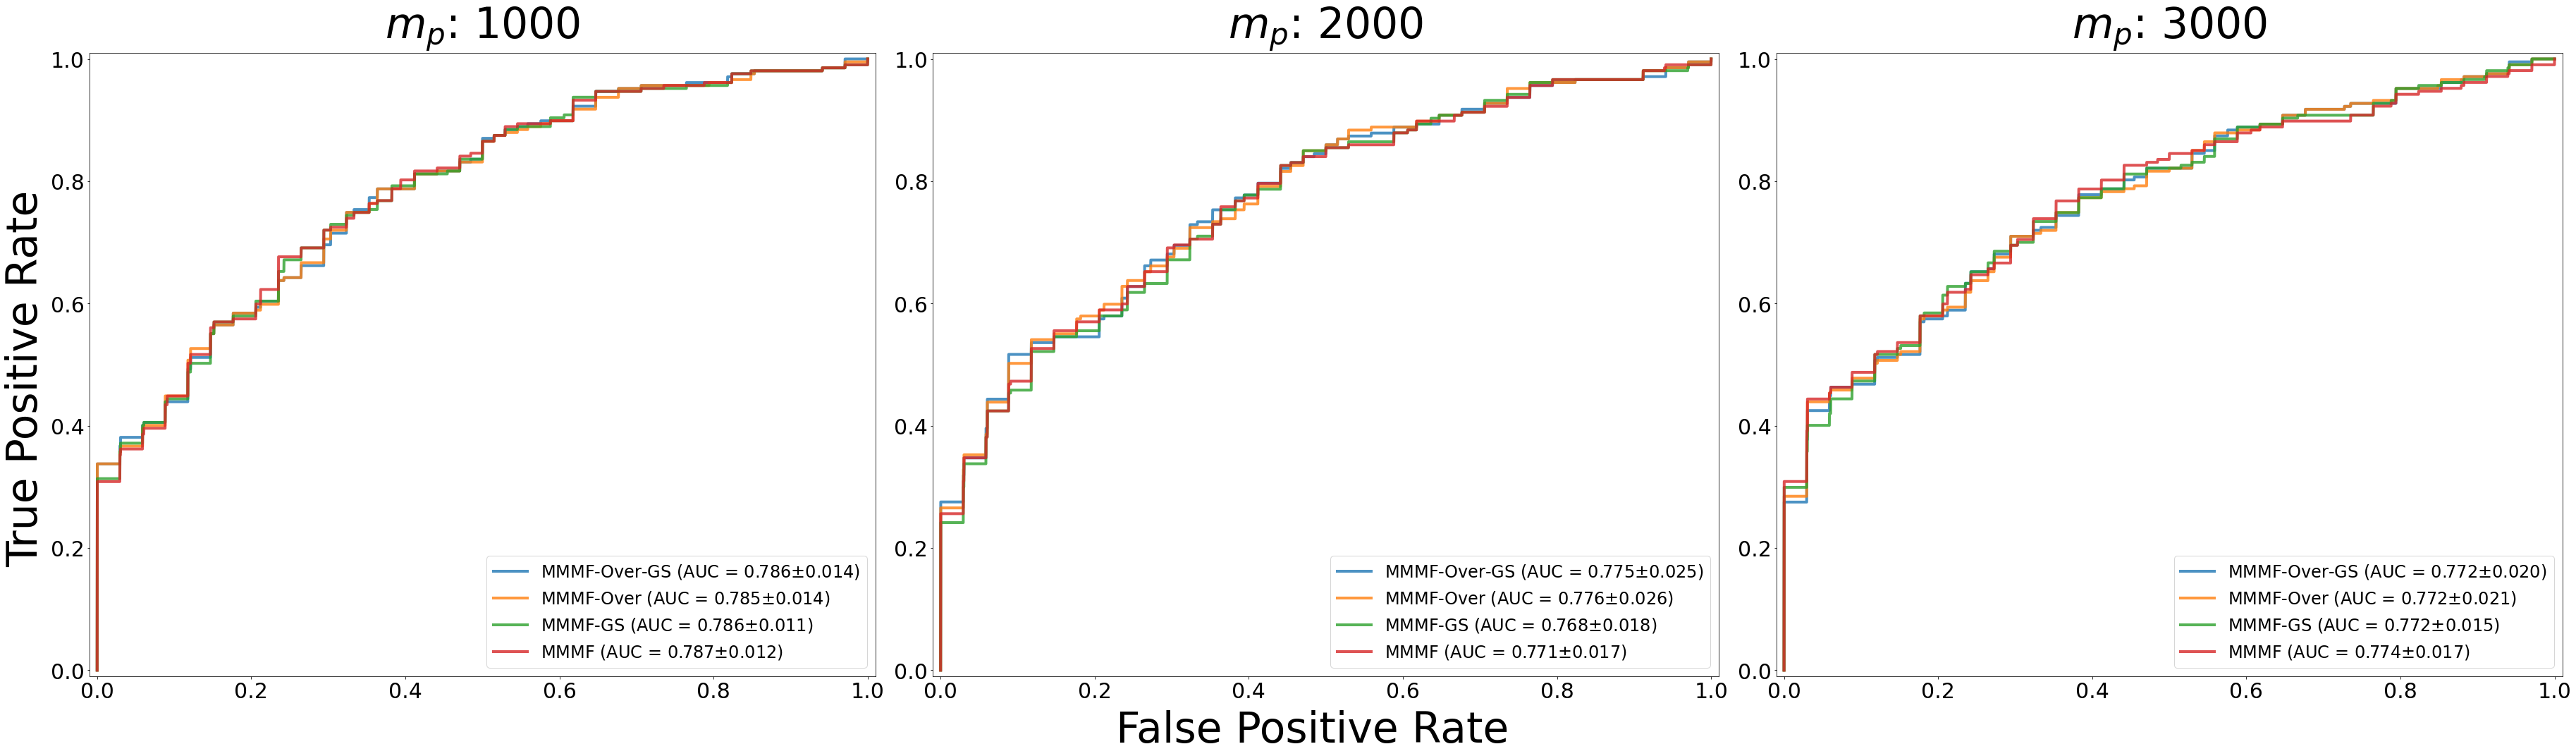

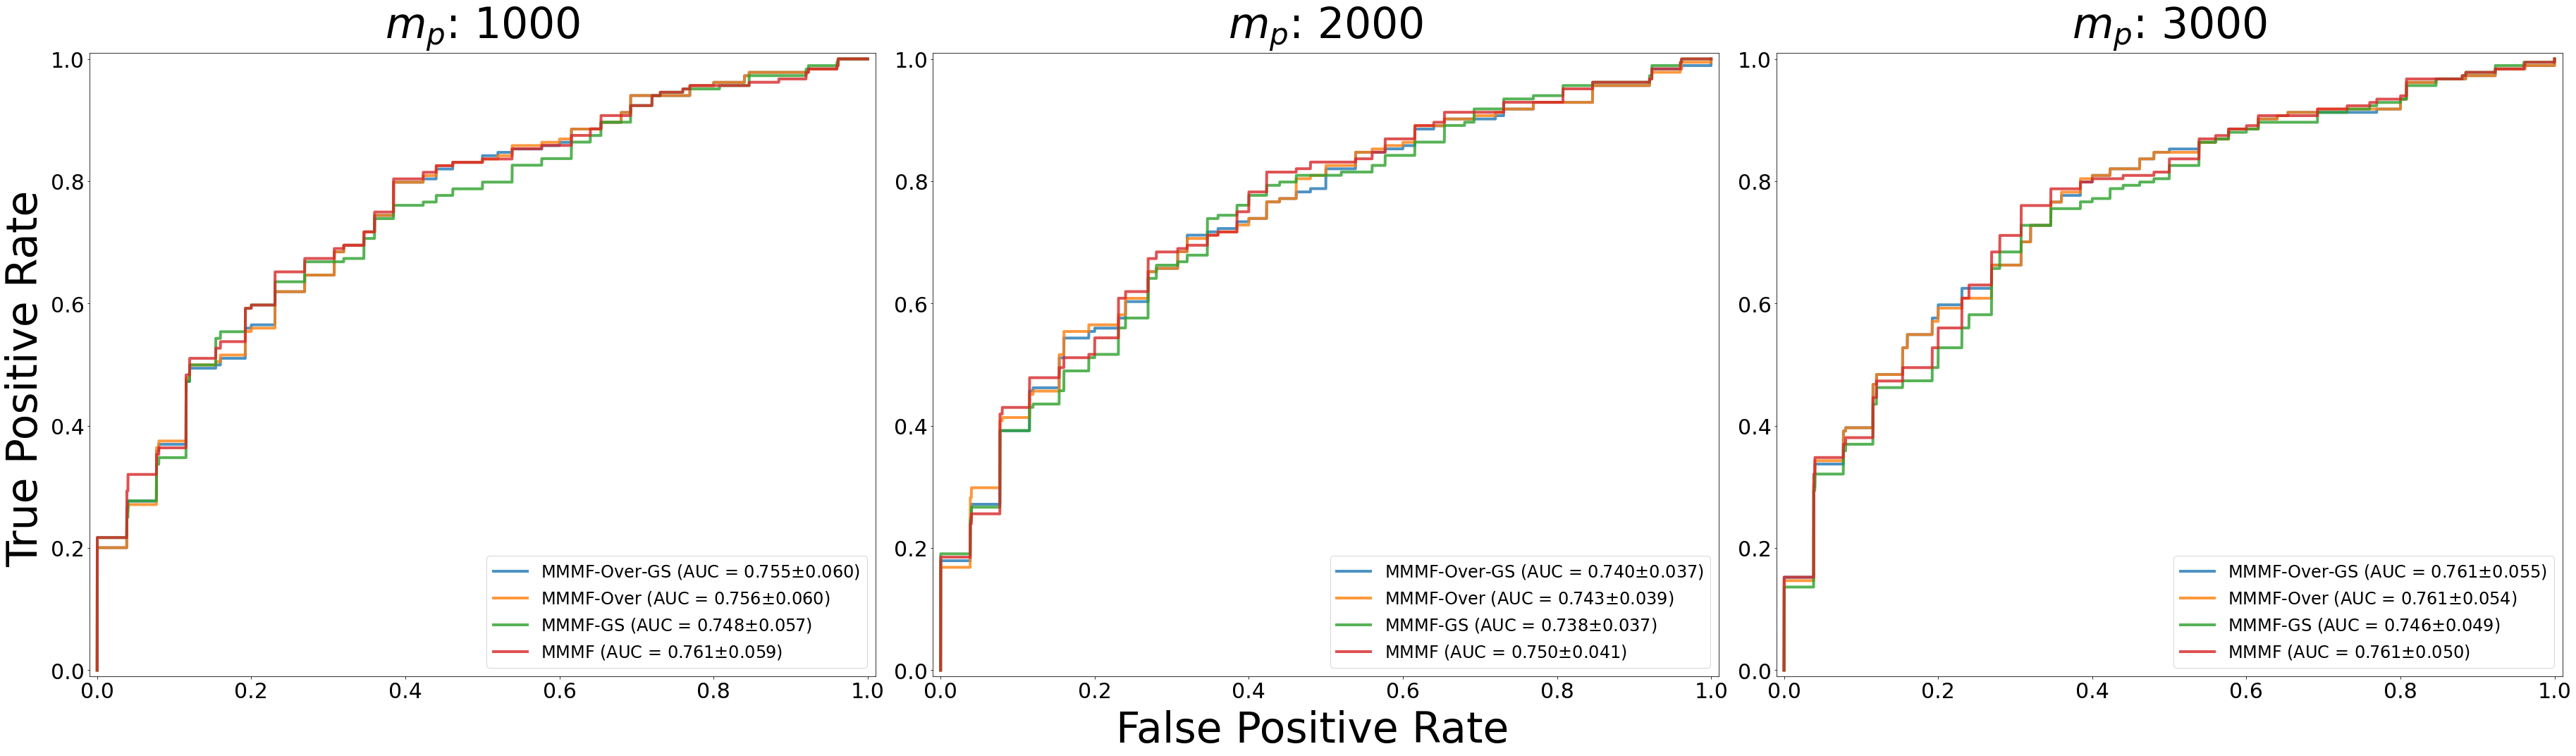

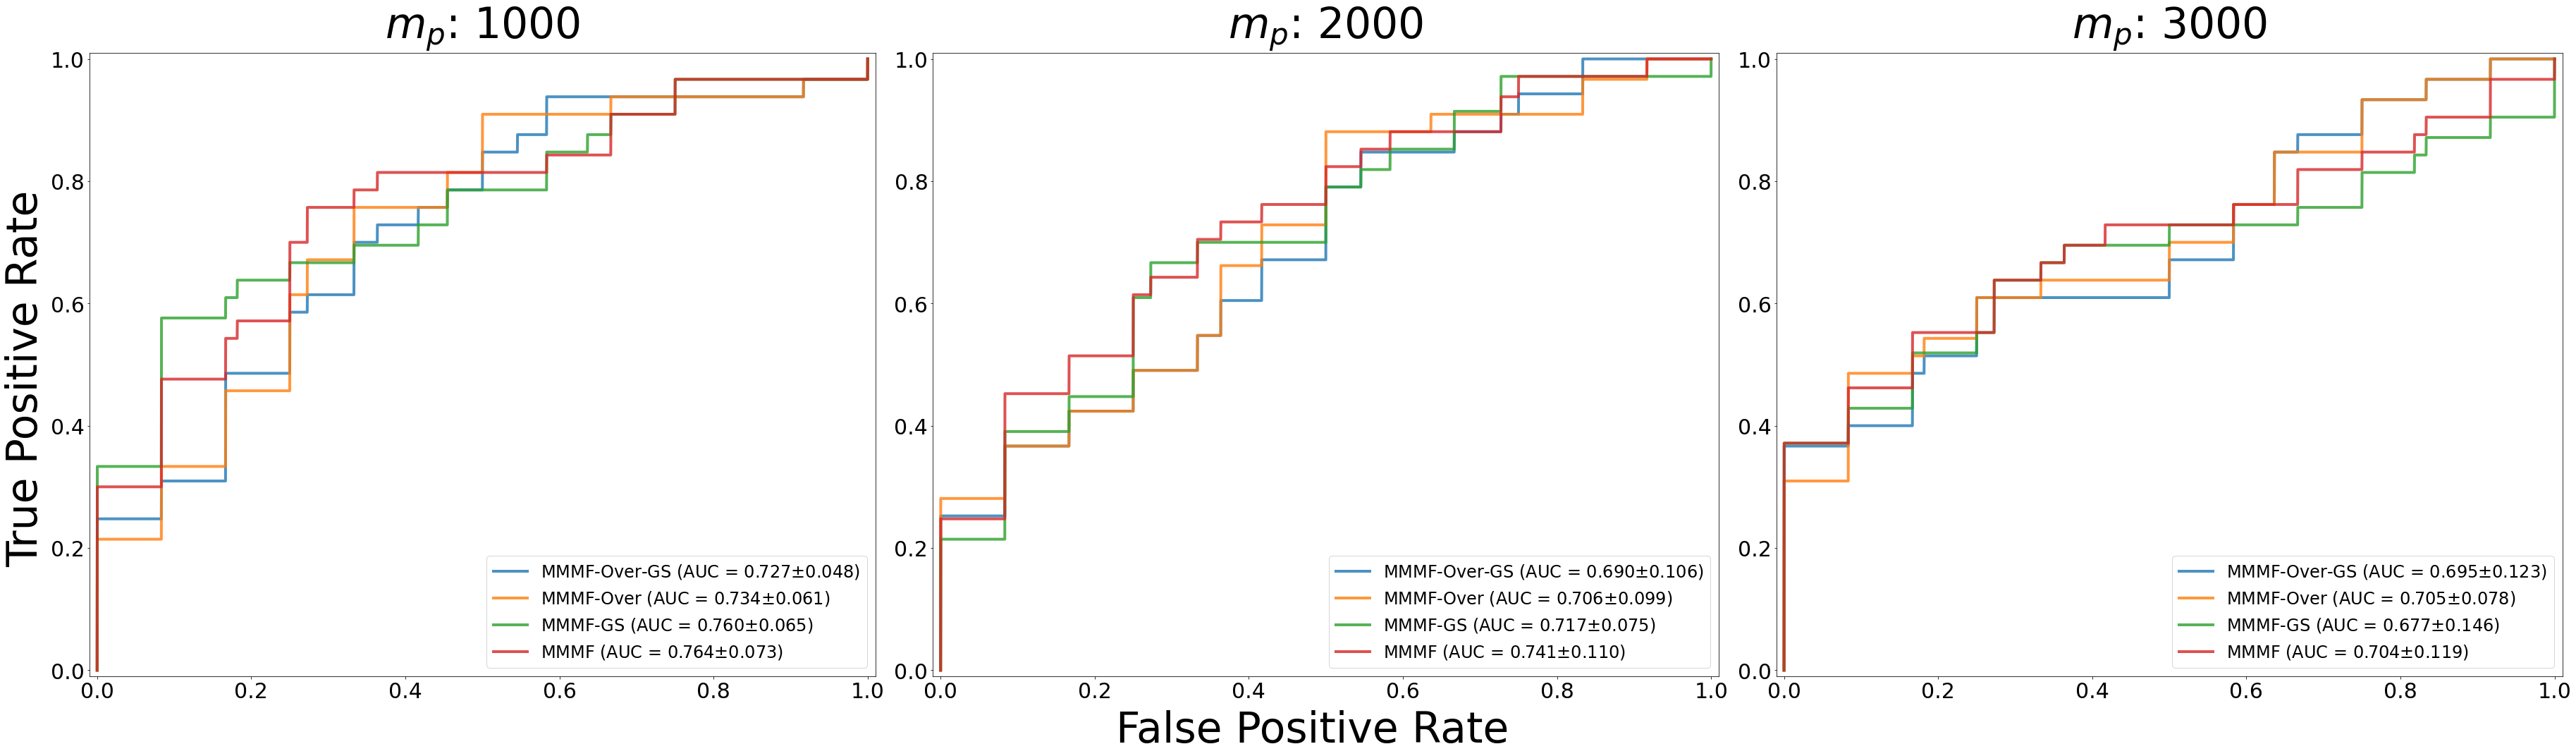

In [3]:
for data_type in ['ADNI', 'ROSMAP', 'KIRC', 'Colon']:
    fig, axes = plt.subplots(1, 3, sharex=True, figsize = (50, 15))
    for i, mp in enumerate(mp_list):
        ax = plt.subplot(1,3,i+1)
        classification_roc_curve_plot(ax, data_type, mp, model_list)
    
    fig.supxlabel('False Positive Rate',fontsize=60)
    fig.text(-0.015, 0.5, 'True Positive Rate', va='center', rotation='vertical',fontsize=60)
    fig.tight_layout()

**Binary Class - ADNI, ROSMAP, KIRC, Colon - PR curve**

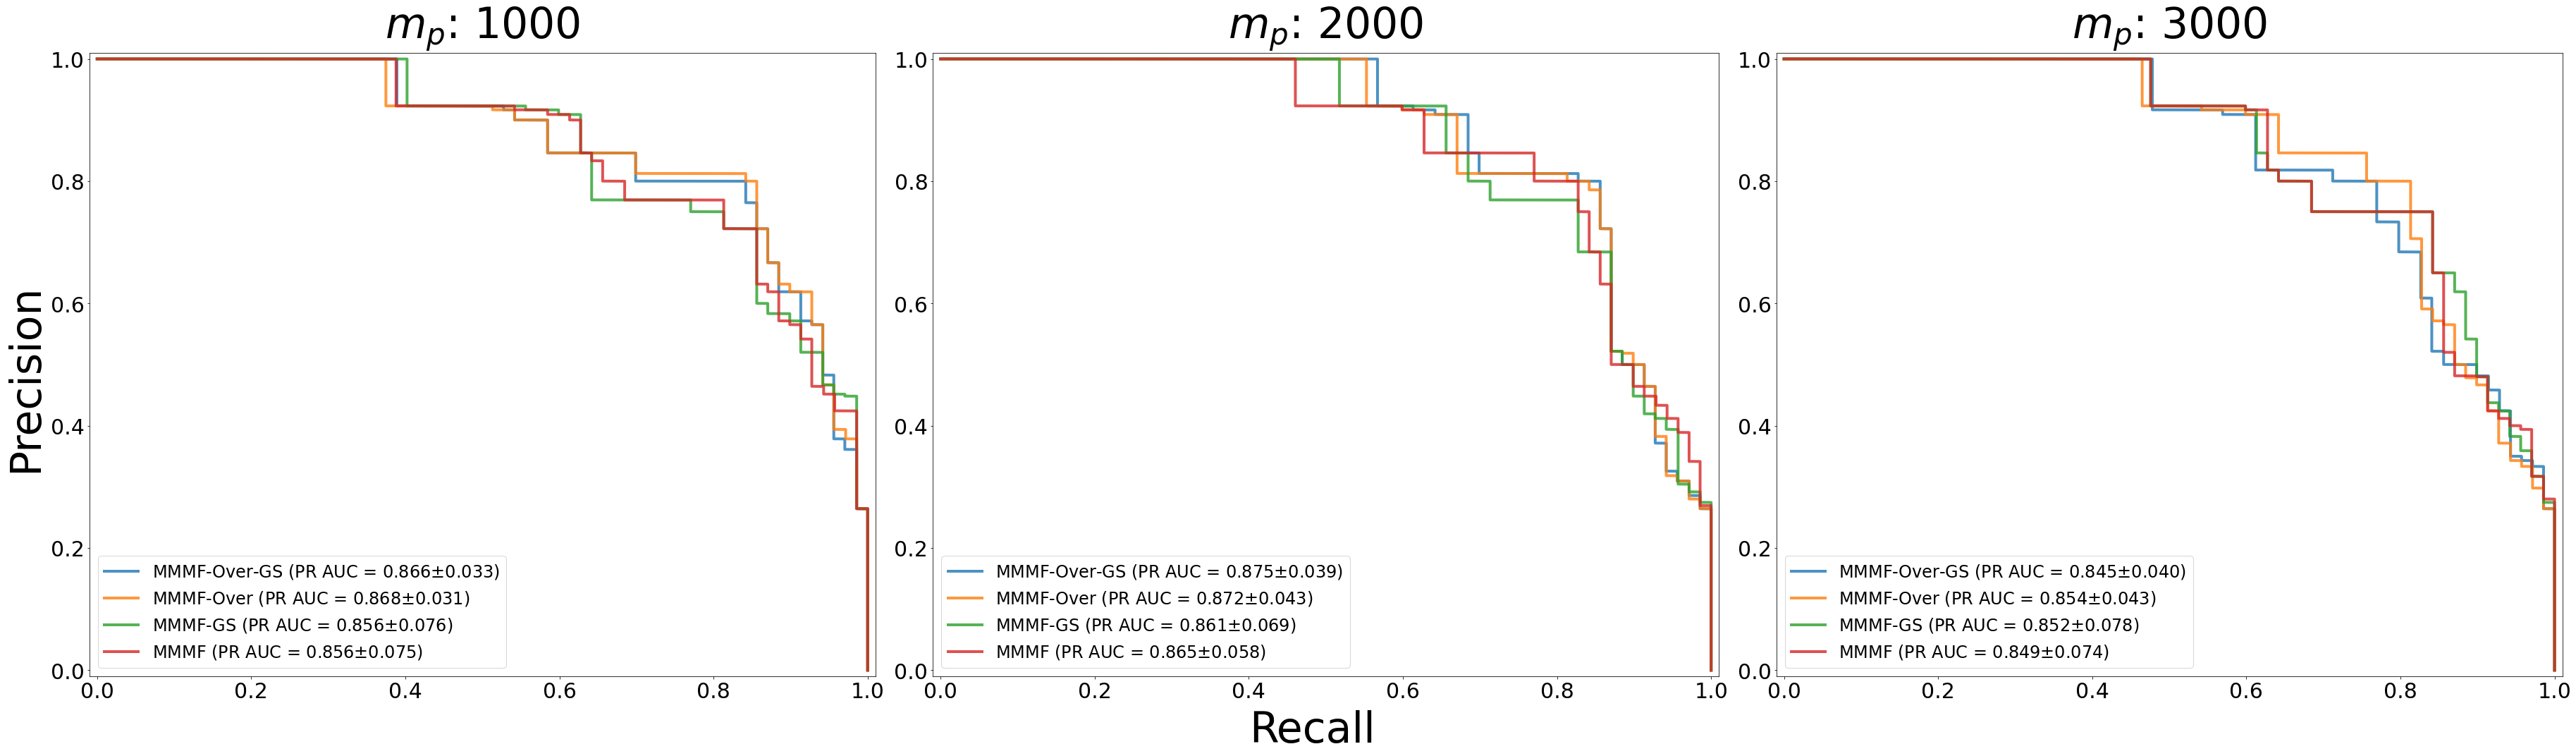

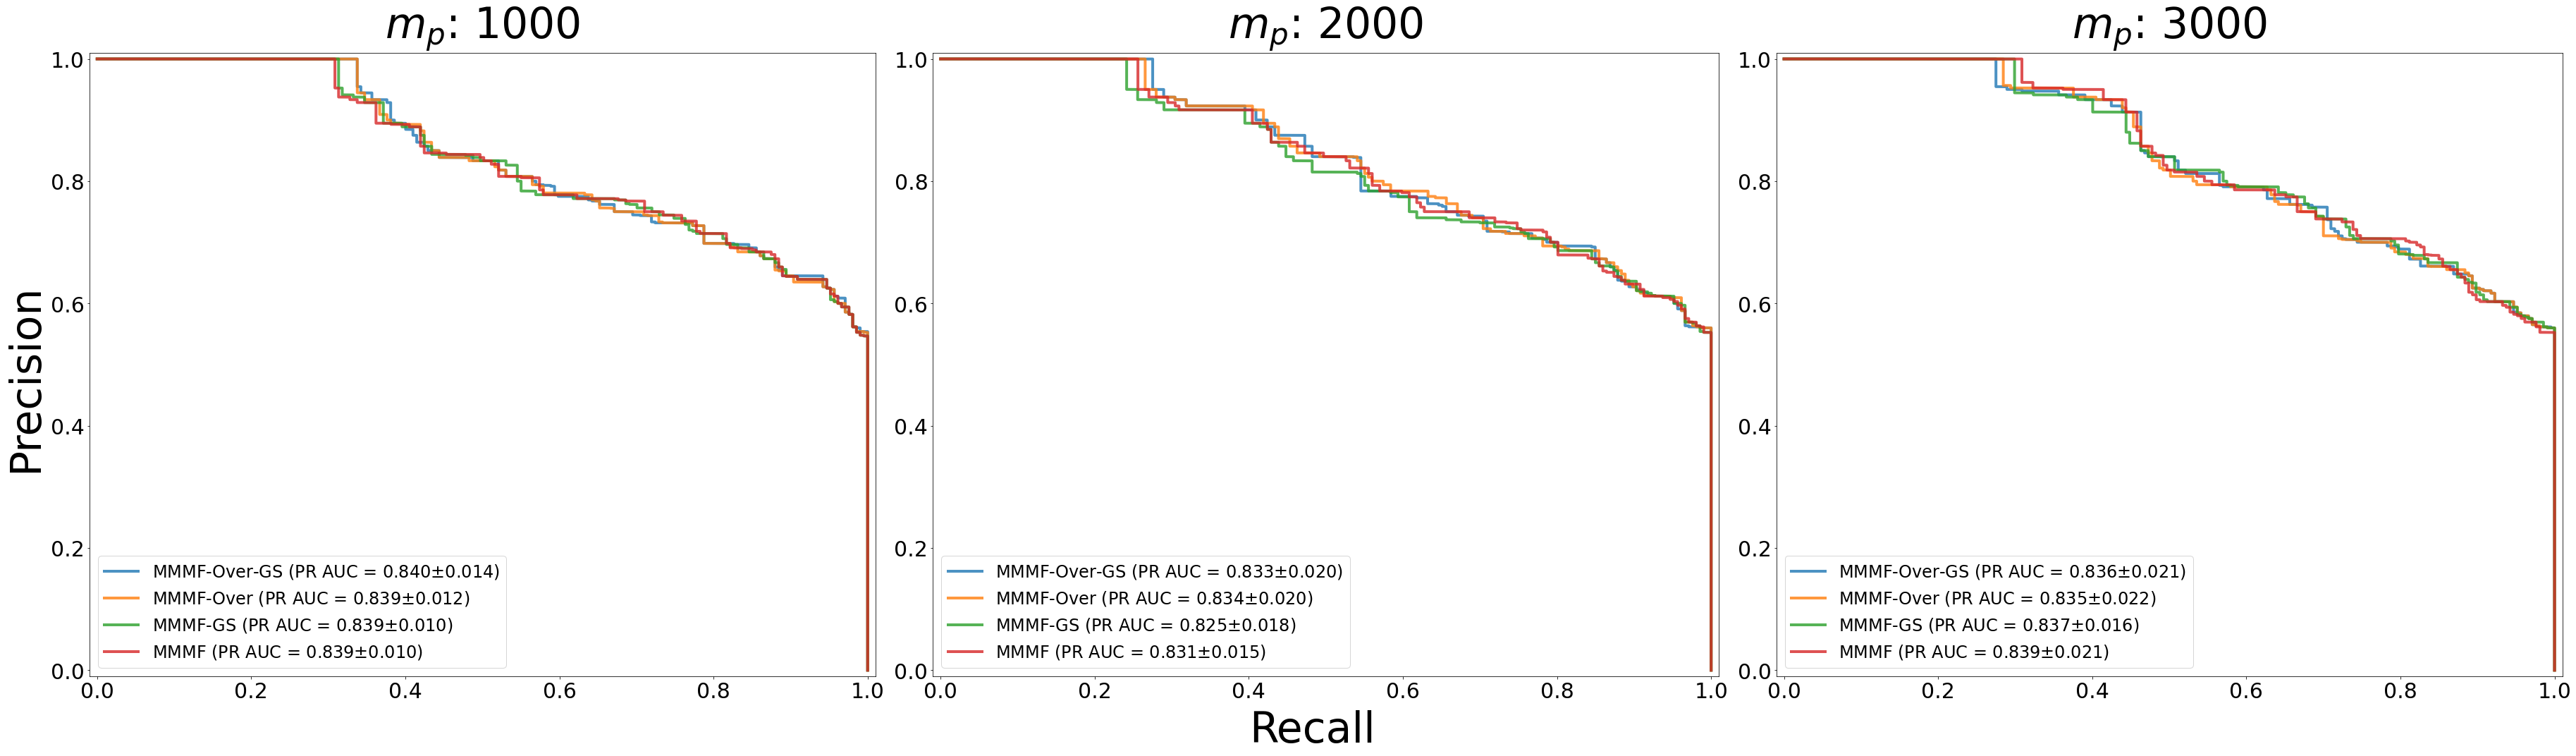

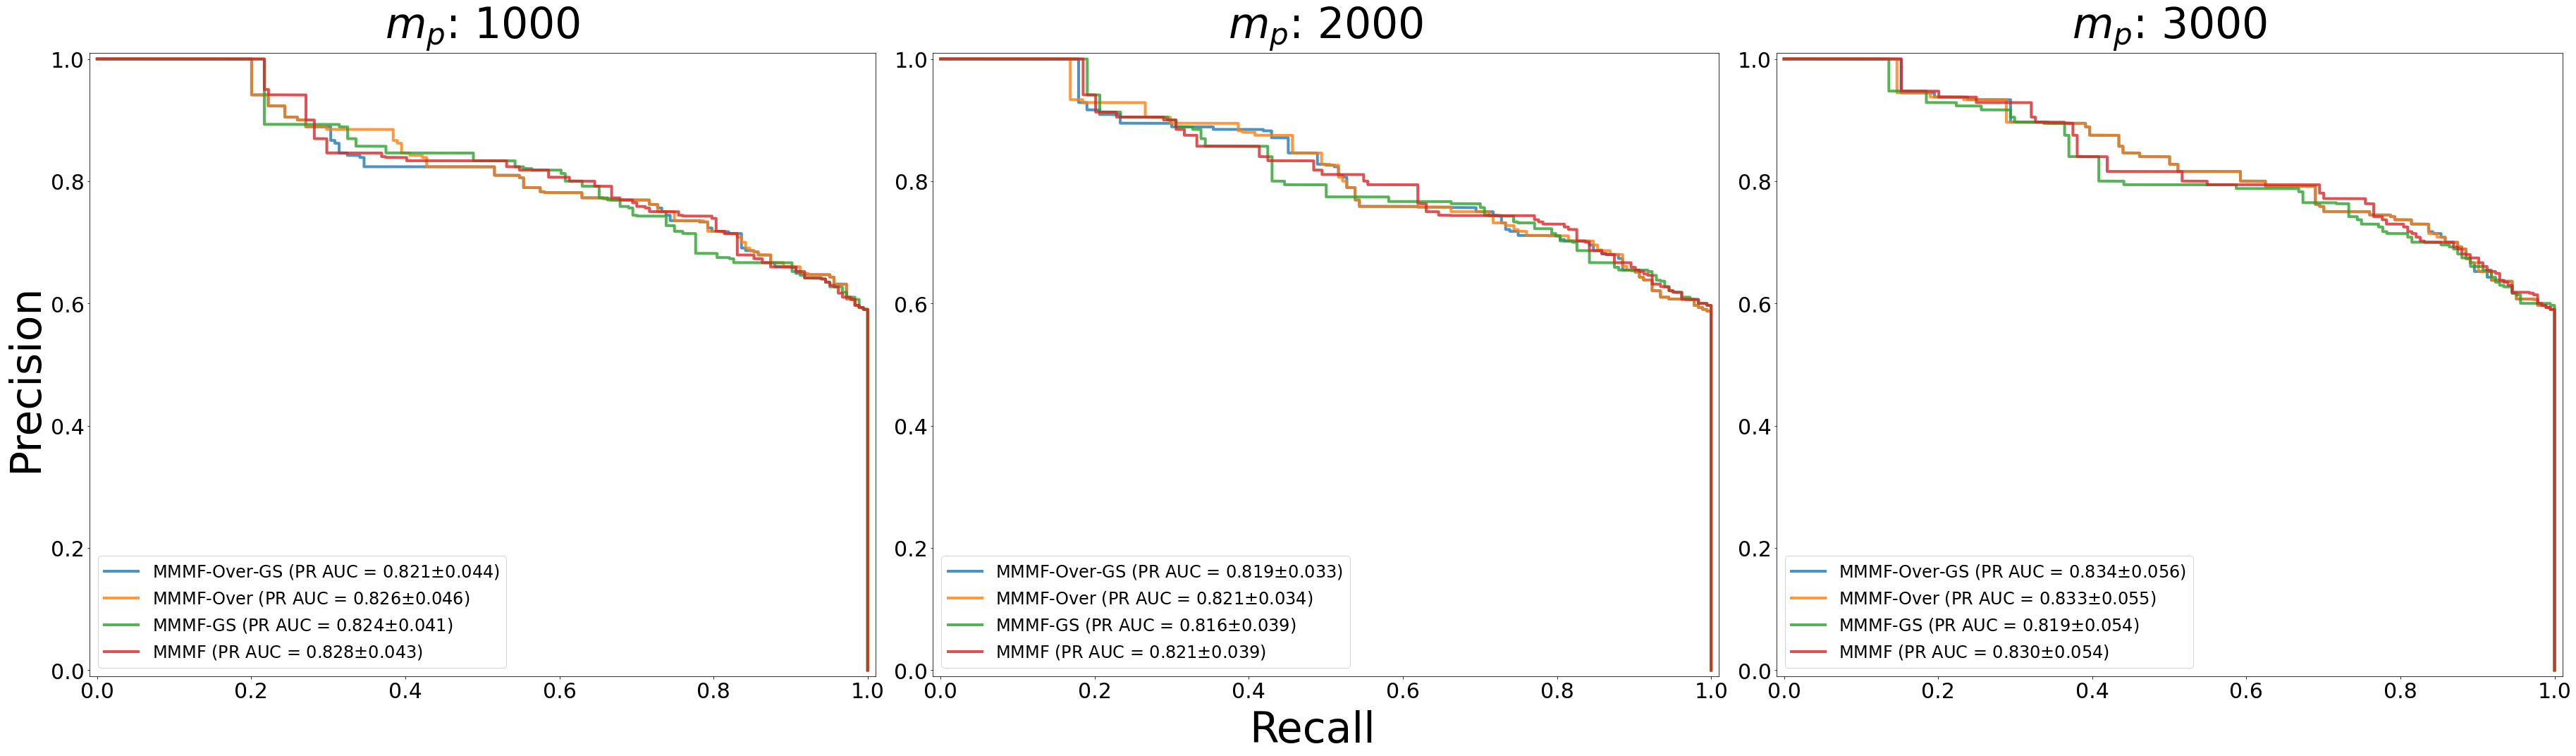

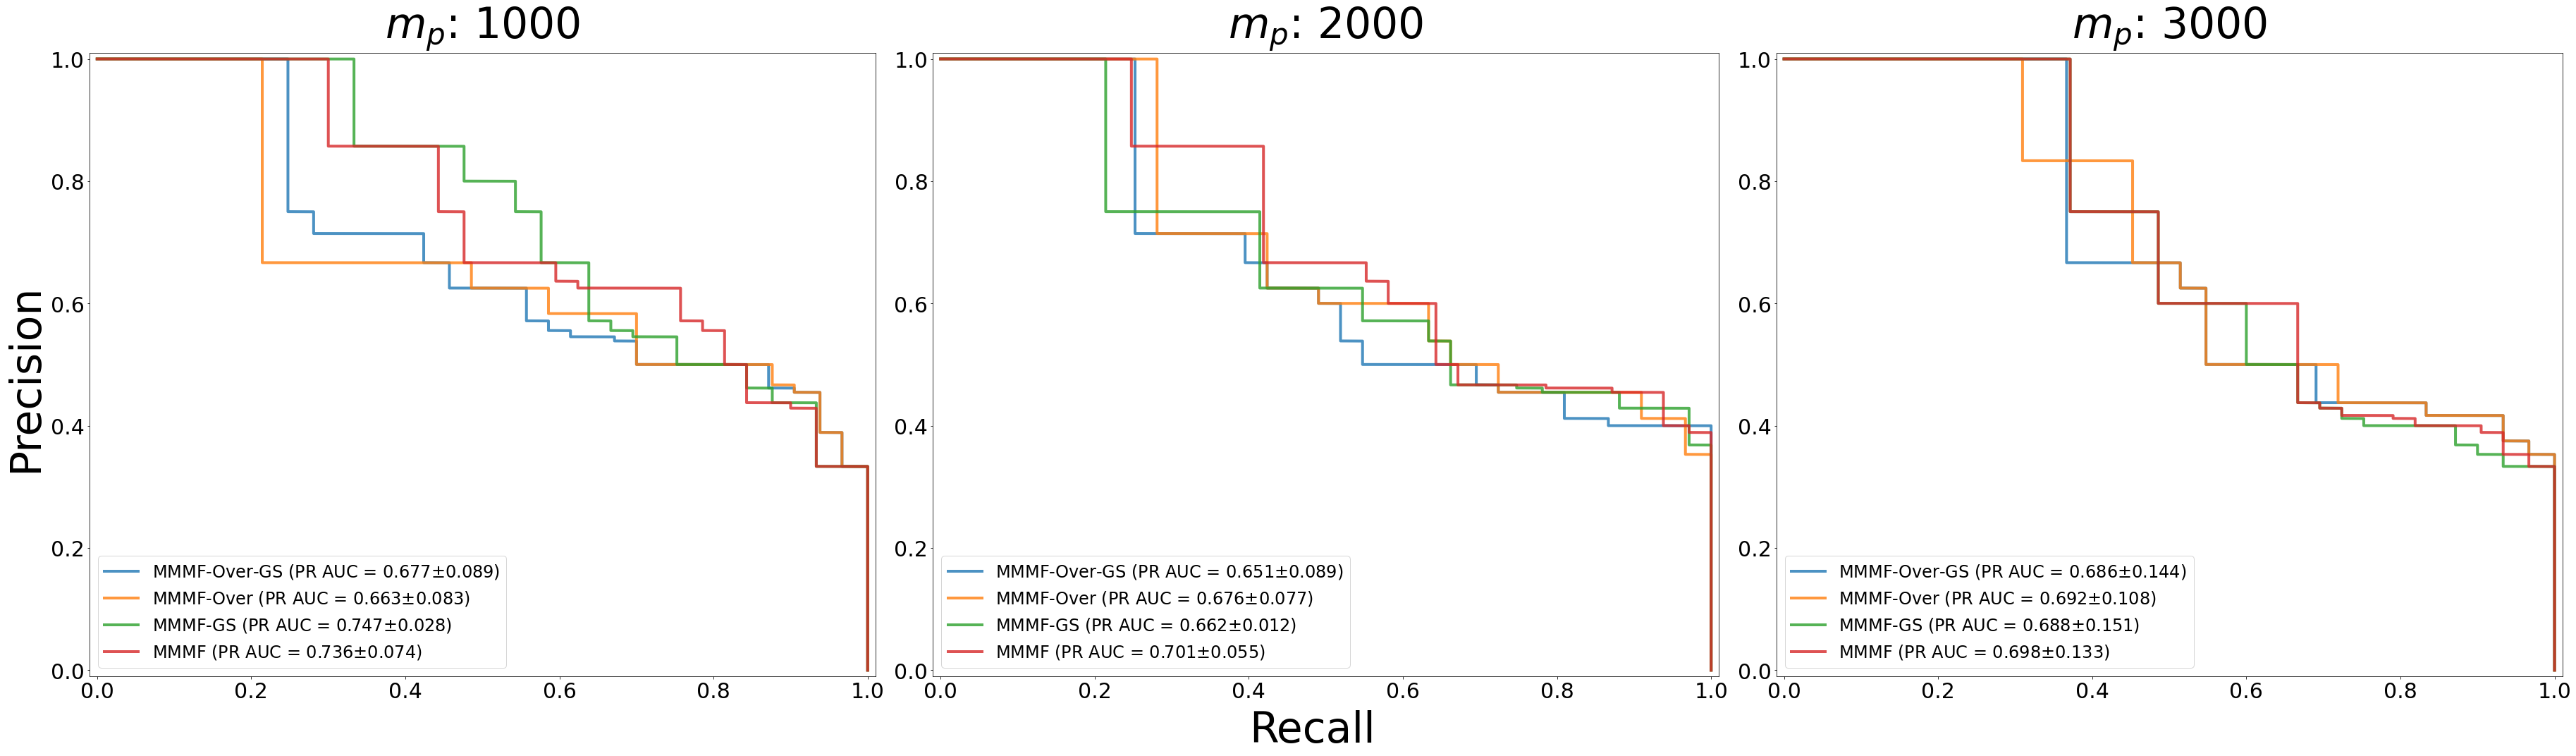

In [4]:
for data_type in ['ADNI', 'ROSMAP', 'KIRC', 'Colon']:
    fig, axes = plt.subplots(1, 3, sharex=True, figsize = (50, 15))
    for i, mp in enumerate(mp_list):
        ax = plt.subplot(1,3,i+1)
        classification_pr_curve_plot(ax, data_type, mp, model_list)
        
    fig.supxlabel('Recall',fontsize=60)
    fig.text(-0.015, 0.5, 'Precision', va='center', rotation='vertical',fontsize=60)
    fig.tight_layout()

**Multi Class - BRCA - AUC curve**
- 0: Luminal A
- 1: Luminal B
- 2: Basal-like
- 3: HER2-enriched

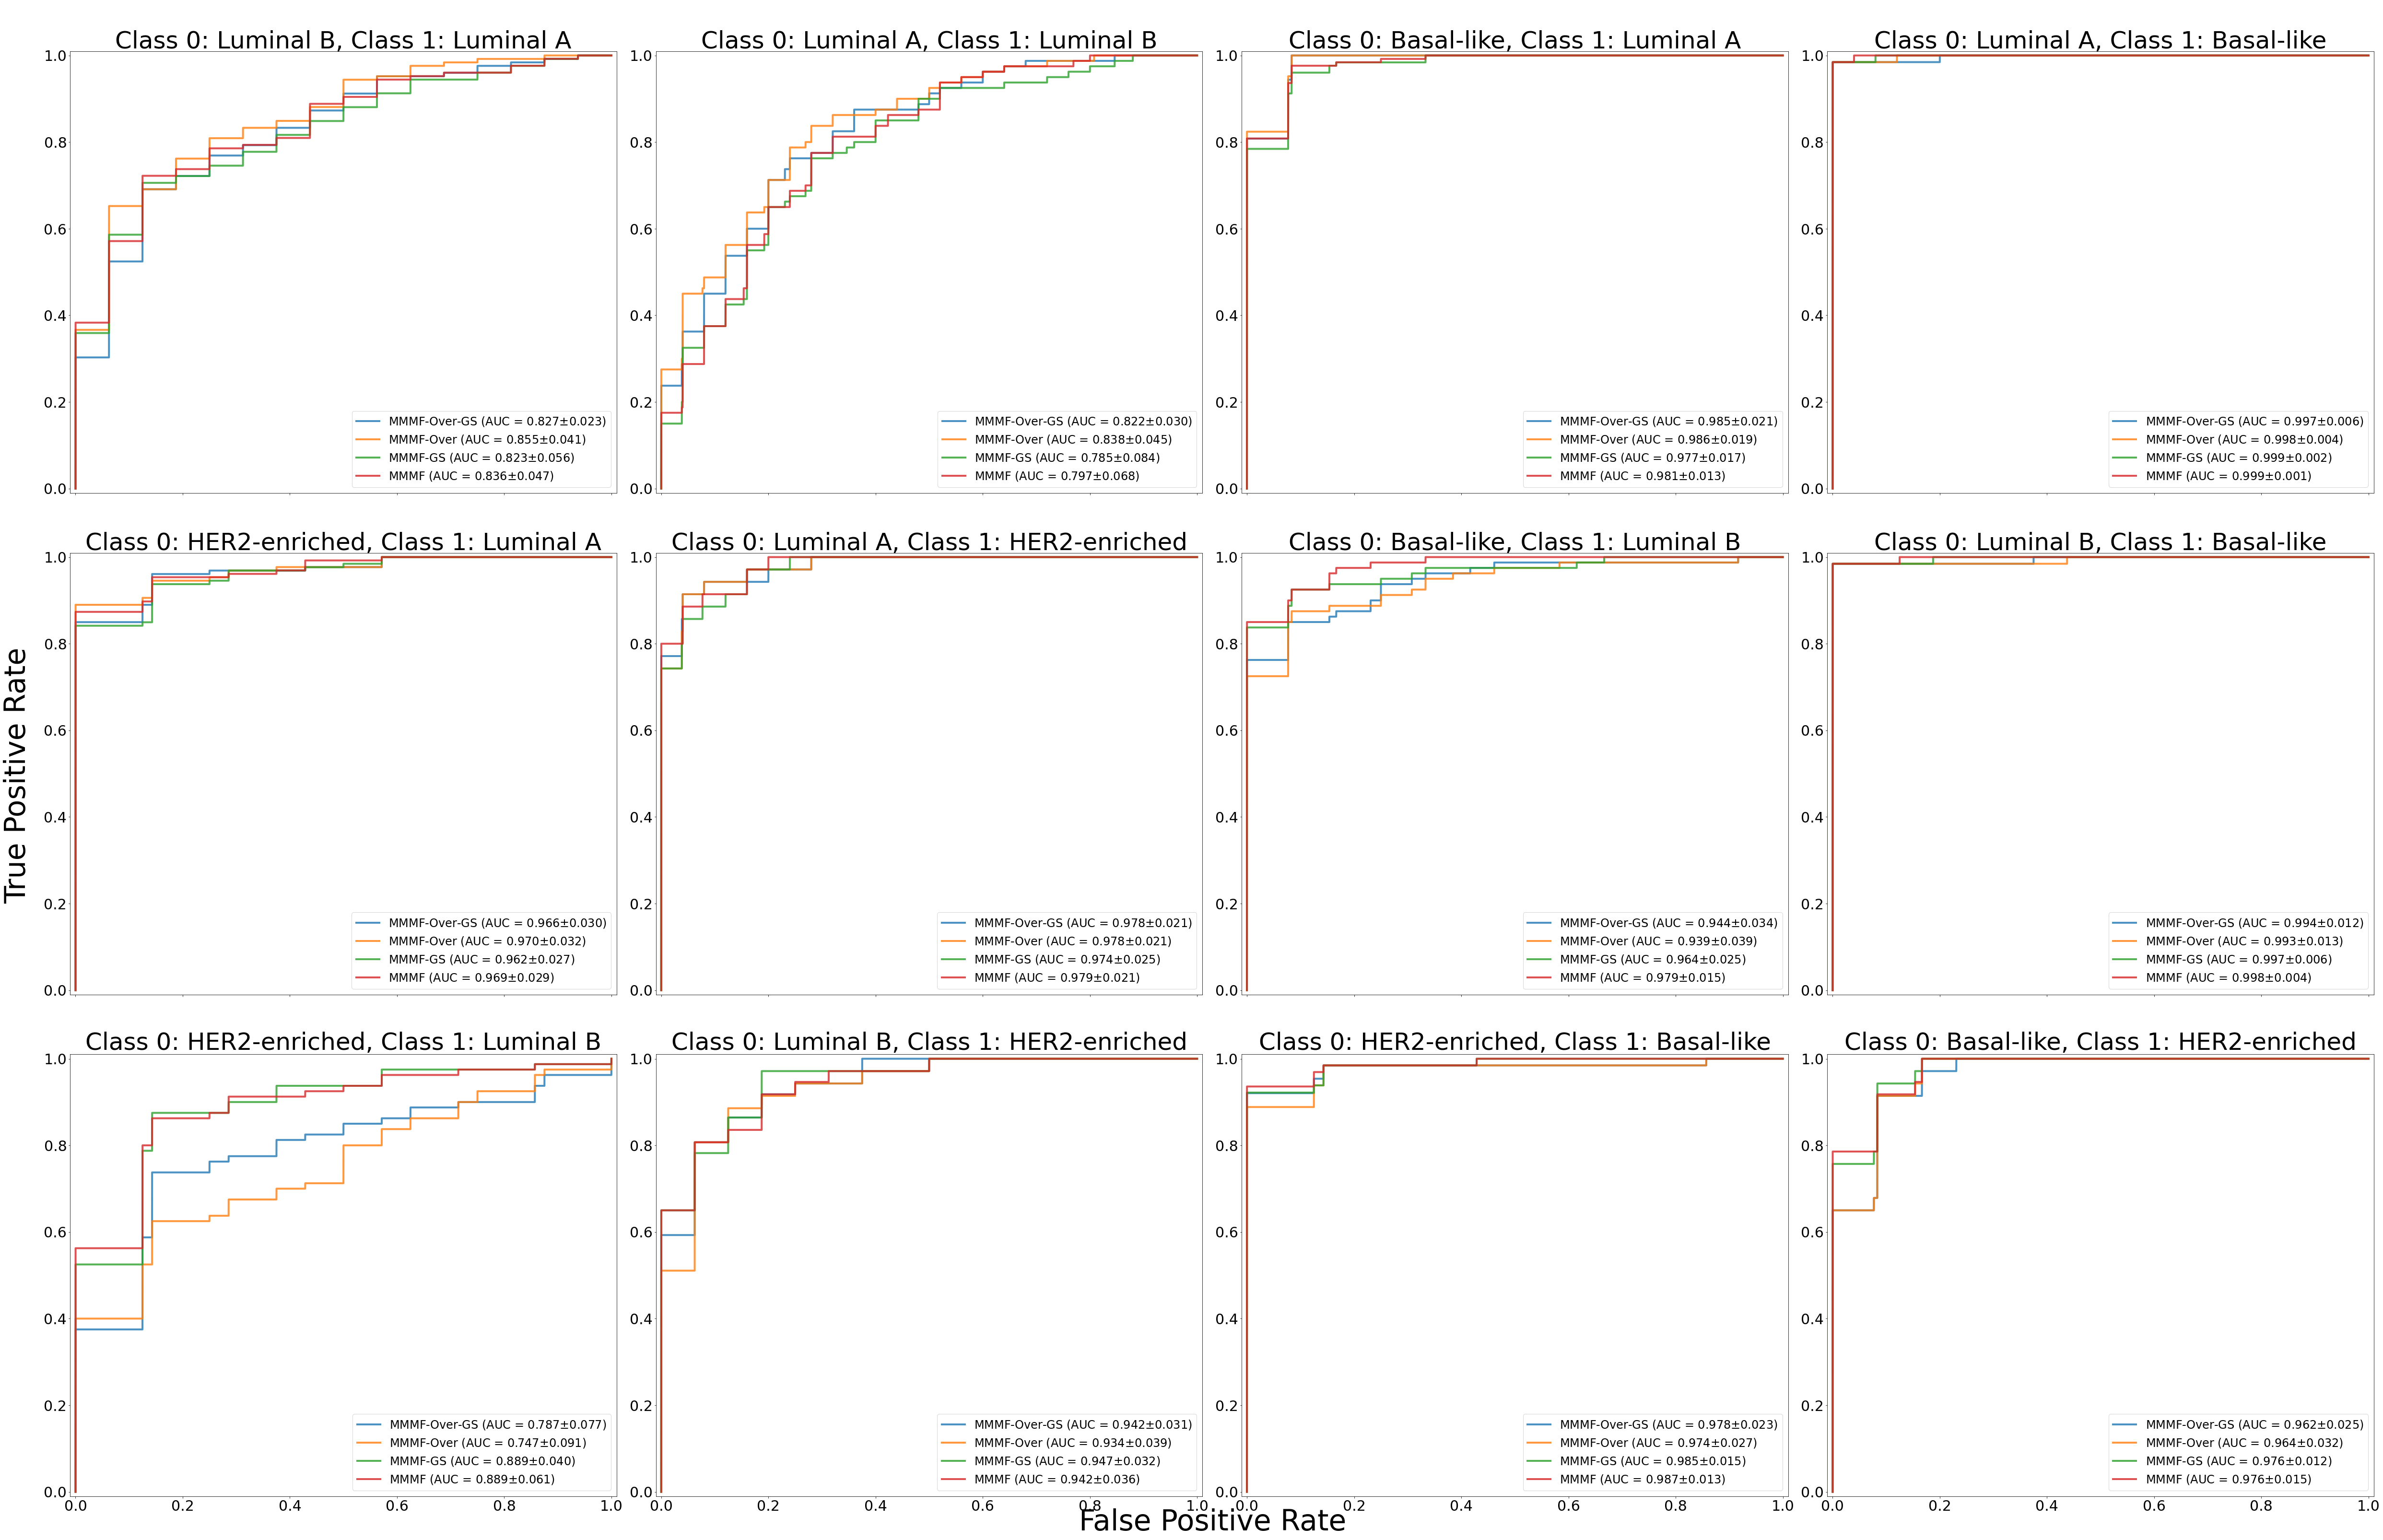

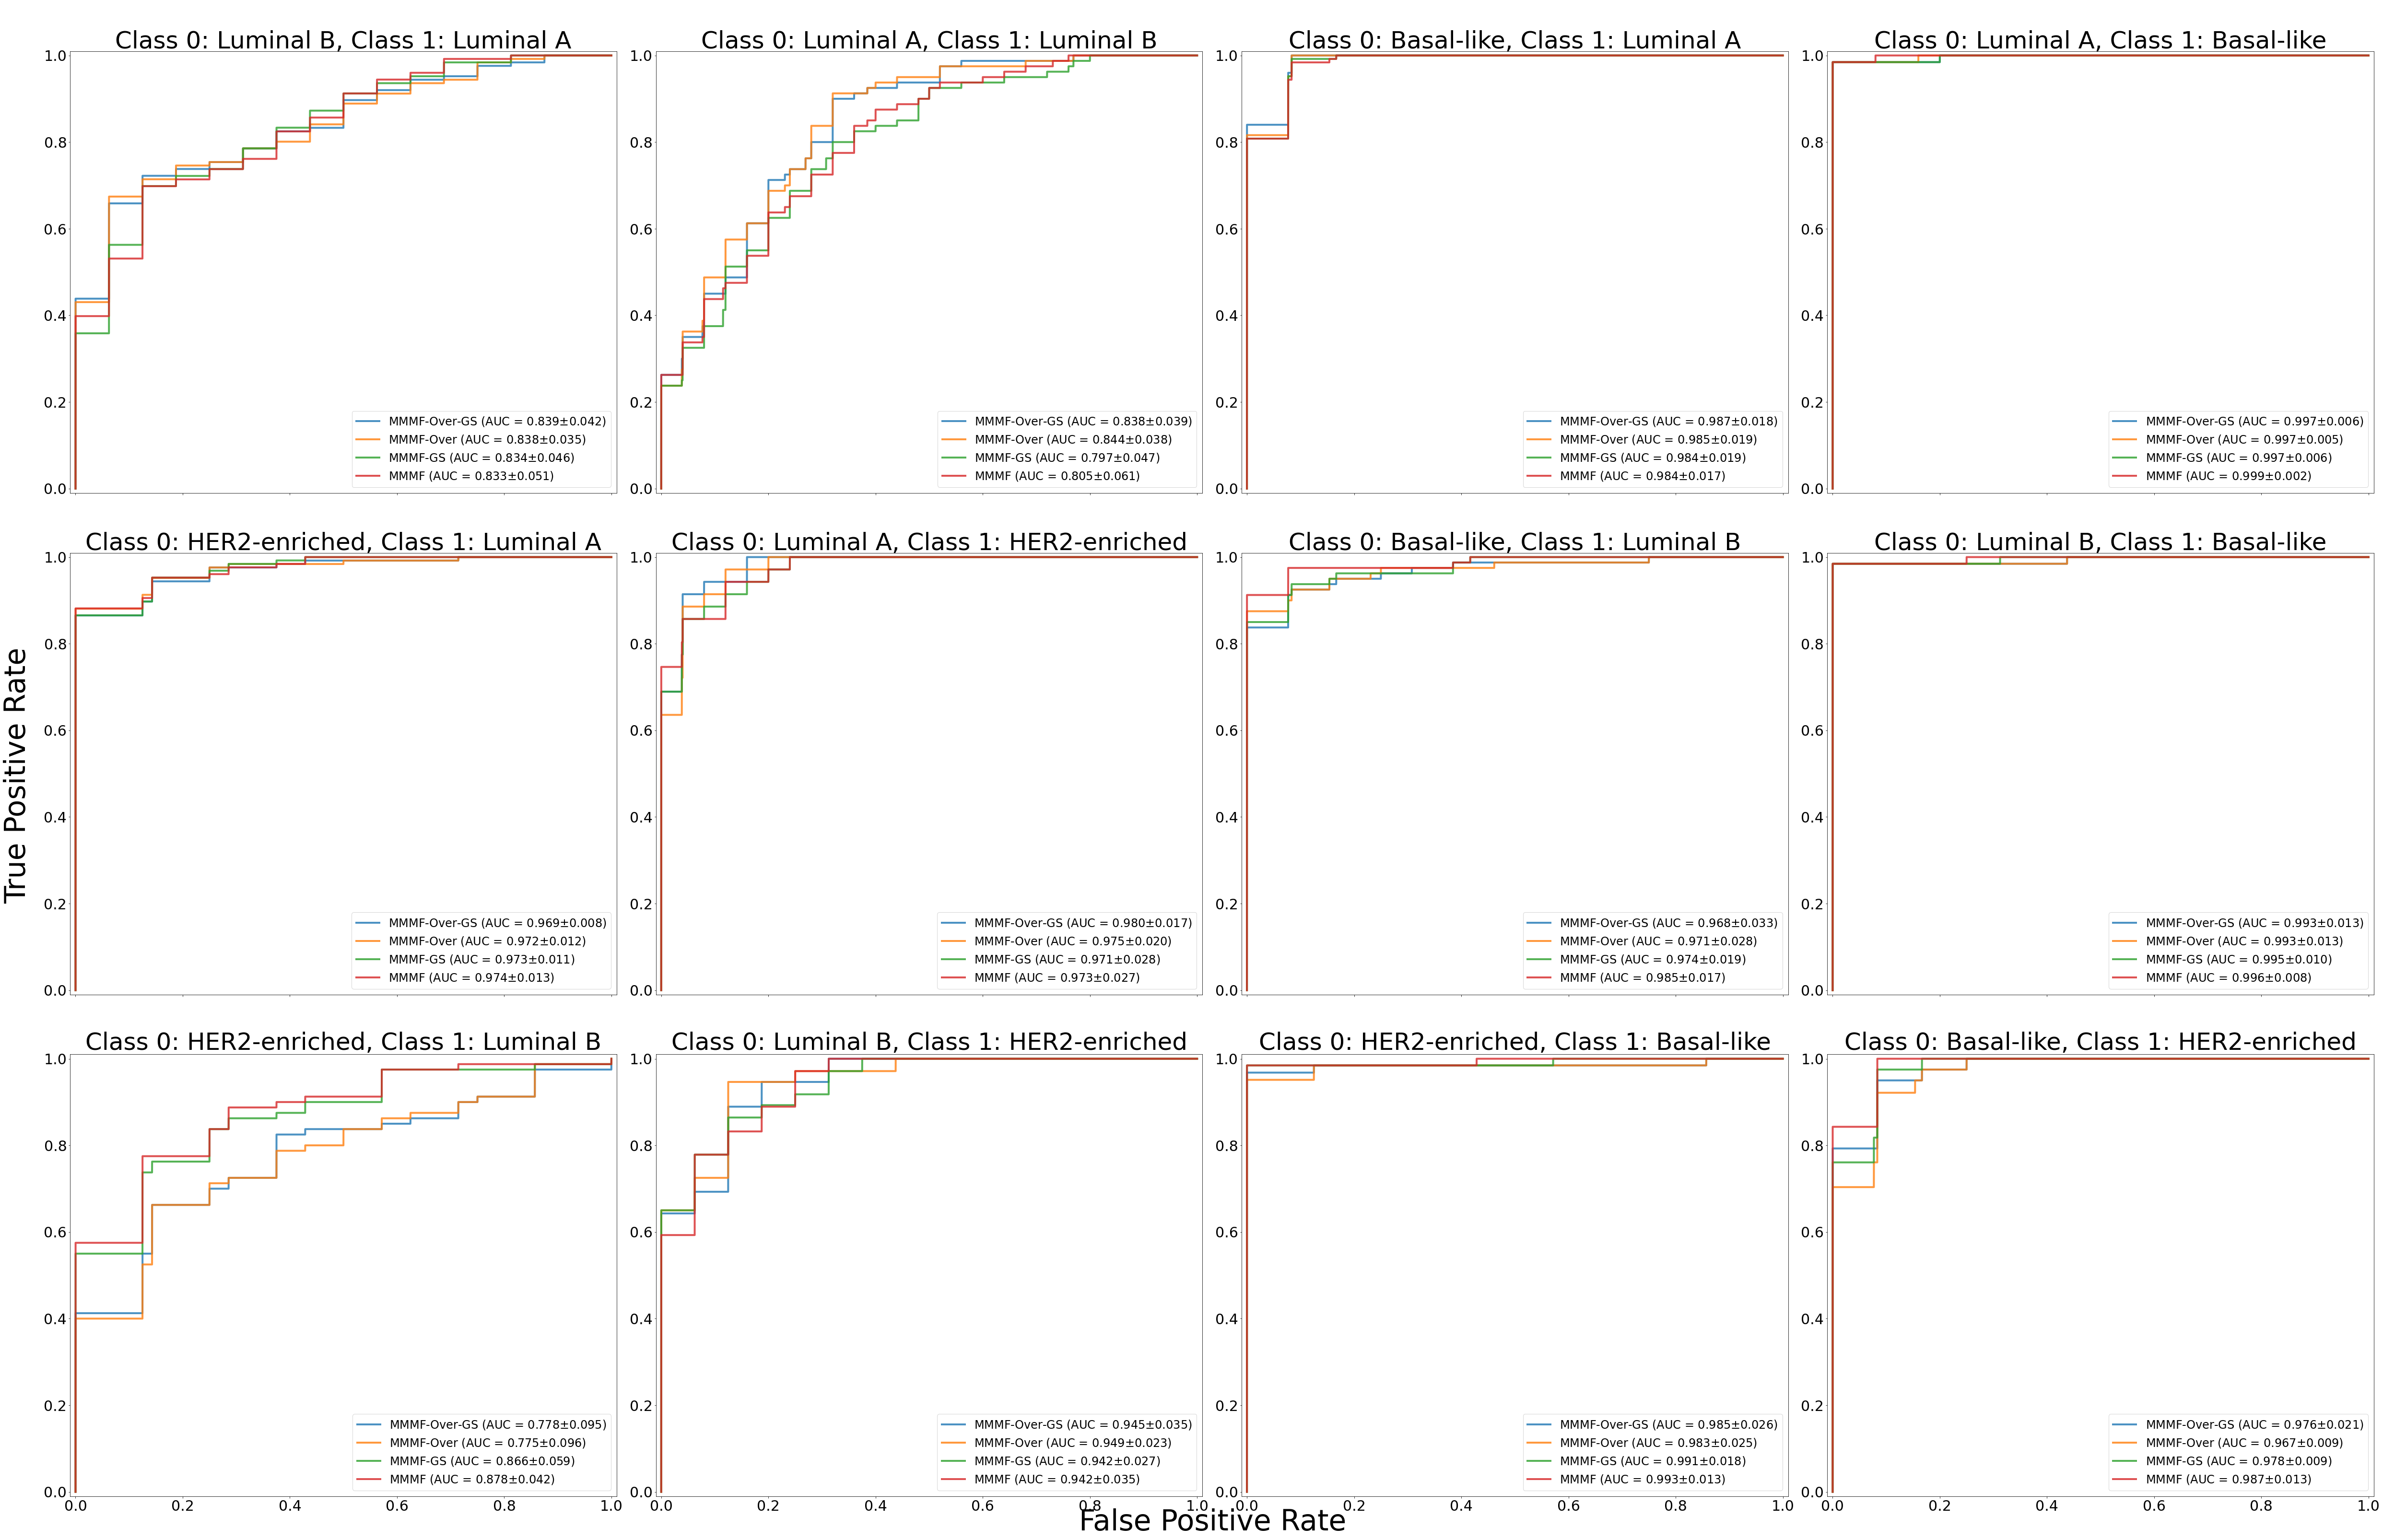

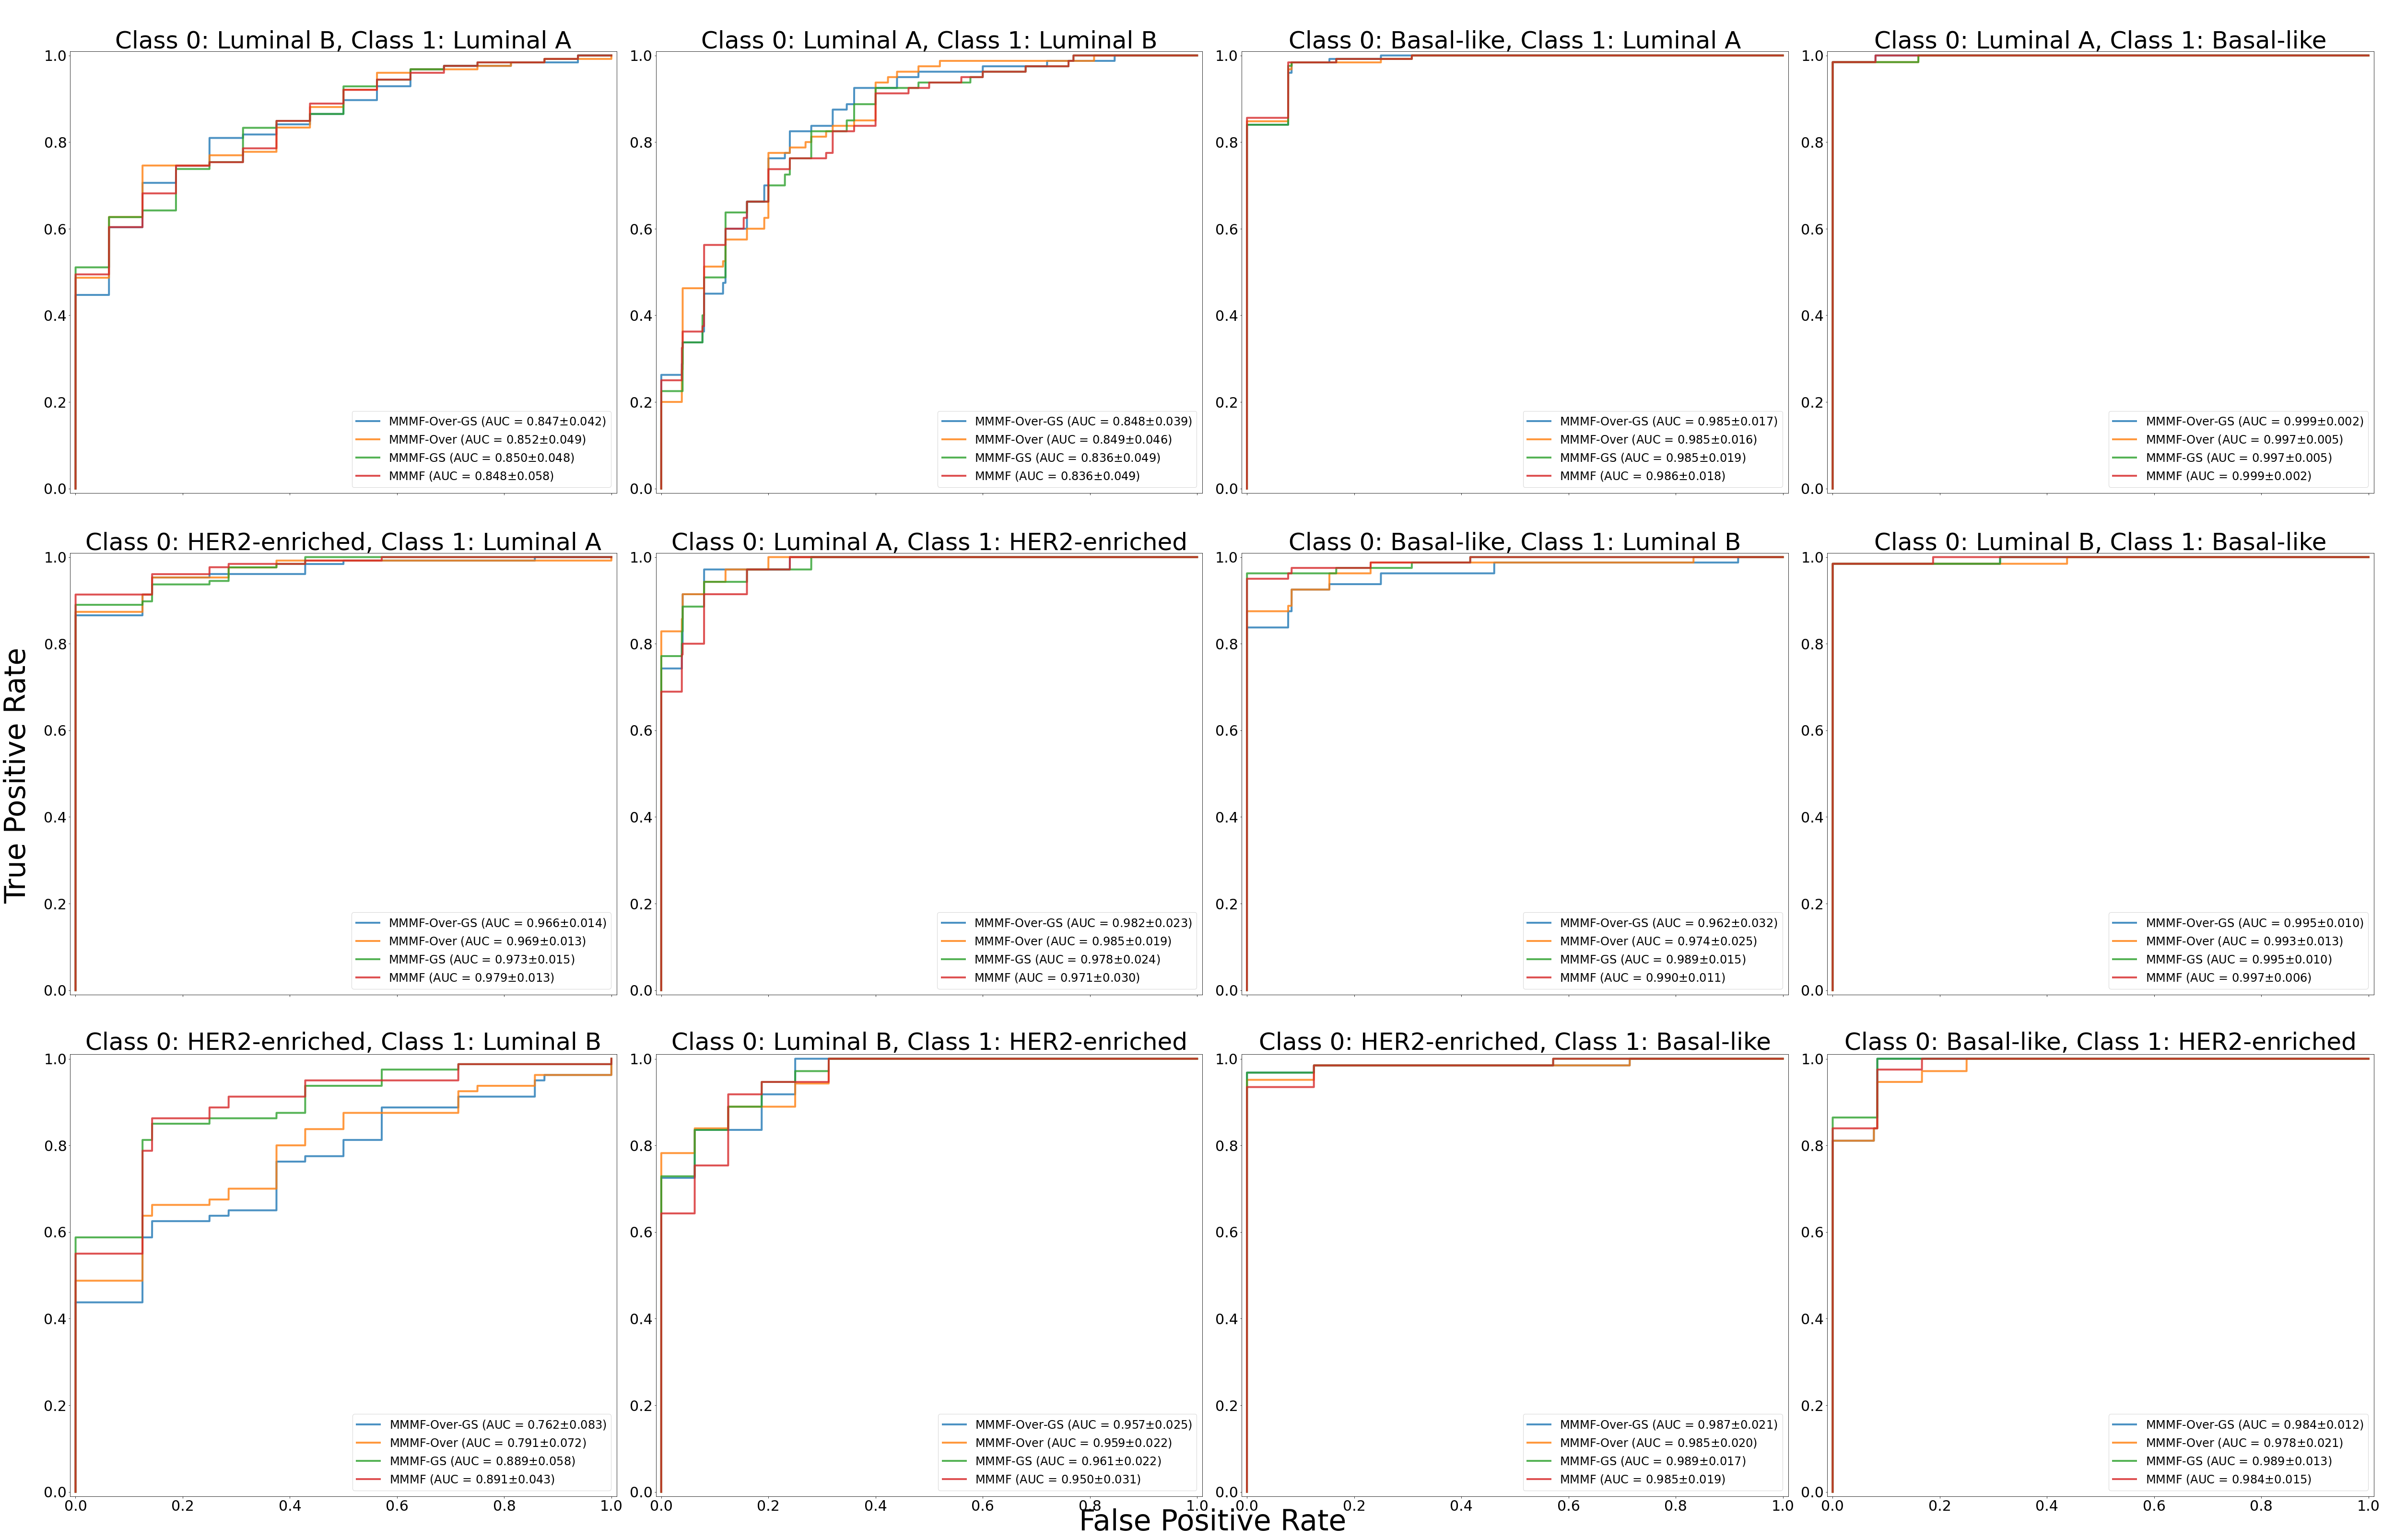

In [5]:
classes_combinations = []
class_list = [0, 1, 2, 3]
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])
        
data_type = 'BRCA'

for mp in mp_list:
    fig, axes = plt.subplots(3, 4, sharex=True, figsize = (68, 45))
    
    for i, comb in enumerate(classes_combinations):
        c1 = comb[0]
        c2 = comb[1]
    
        ax = plt.subplot(3,4,i+1)
        classification_roc_curve_plot2(ax, data_type, mp, model_list, c1, c2)
    
    fig.supxlabel('False Positive Rate',fontsize=60)
    fig.text(-0.015, 0.5, 'True Positive Rate', va='center', rotation='vertical',fontsize=60)
    fig.tight_layout()

**Multi Class - BRCA - PR curve**
- 0: Luminal A
- 1: Luminal B
- 2: Basal-like
- 3: HER2-enriched

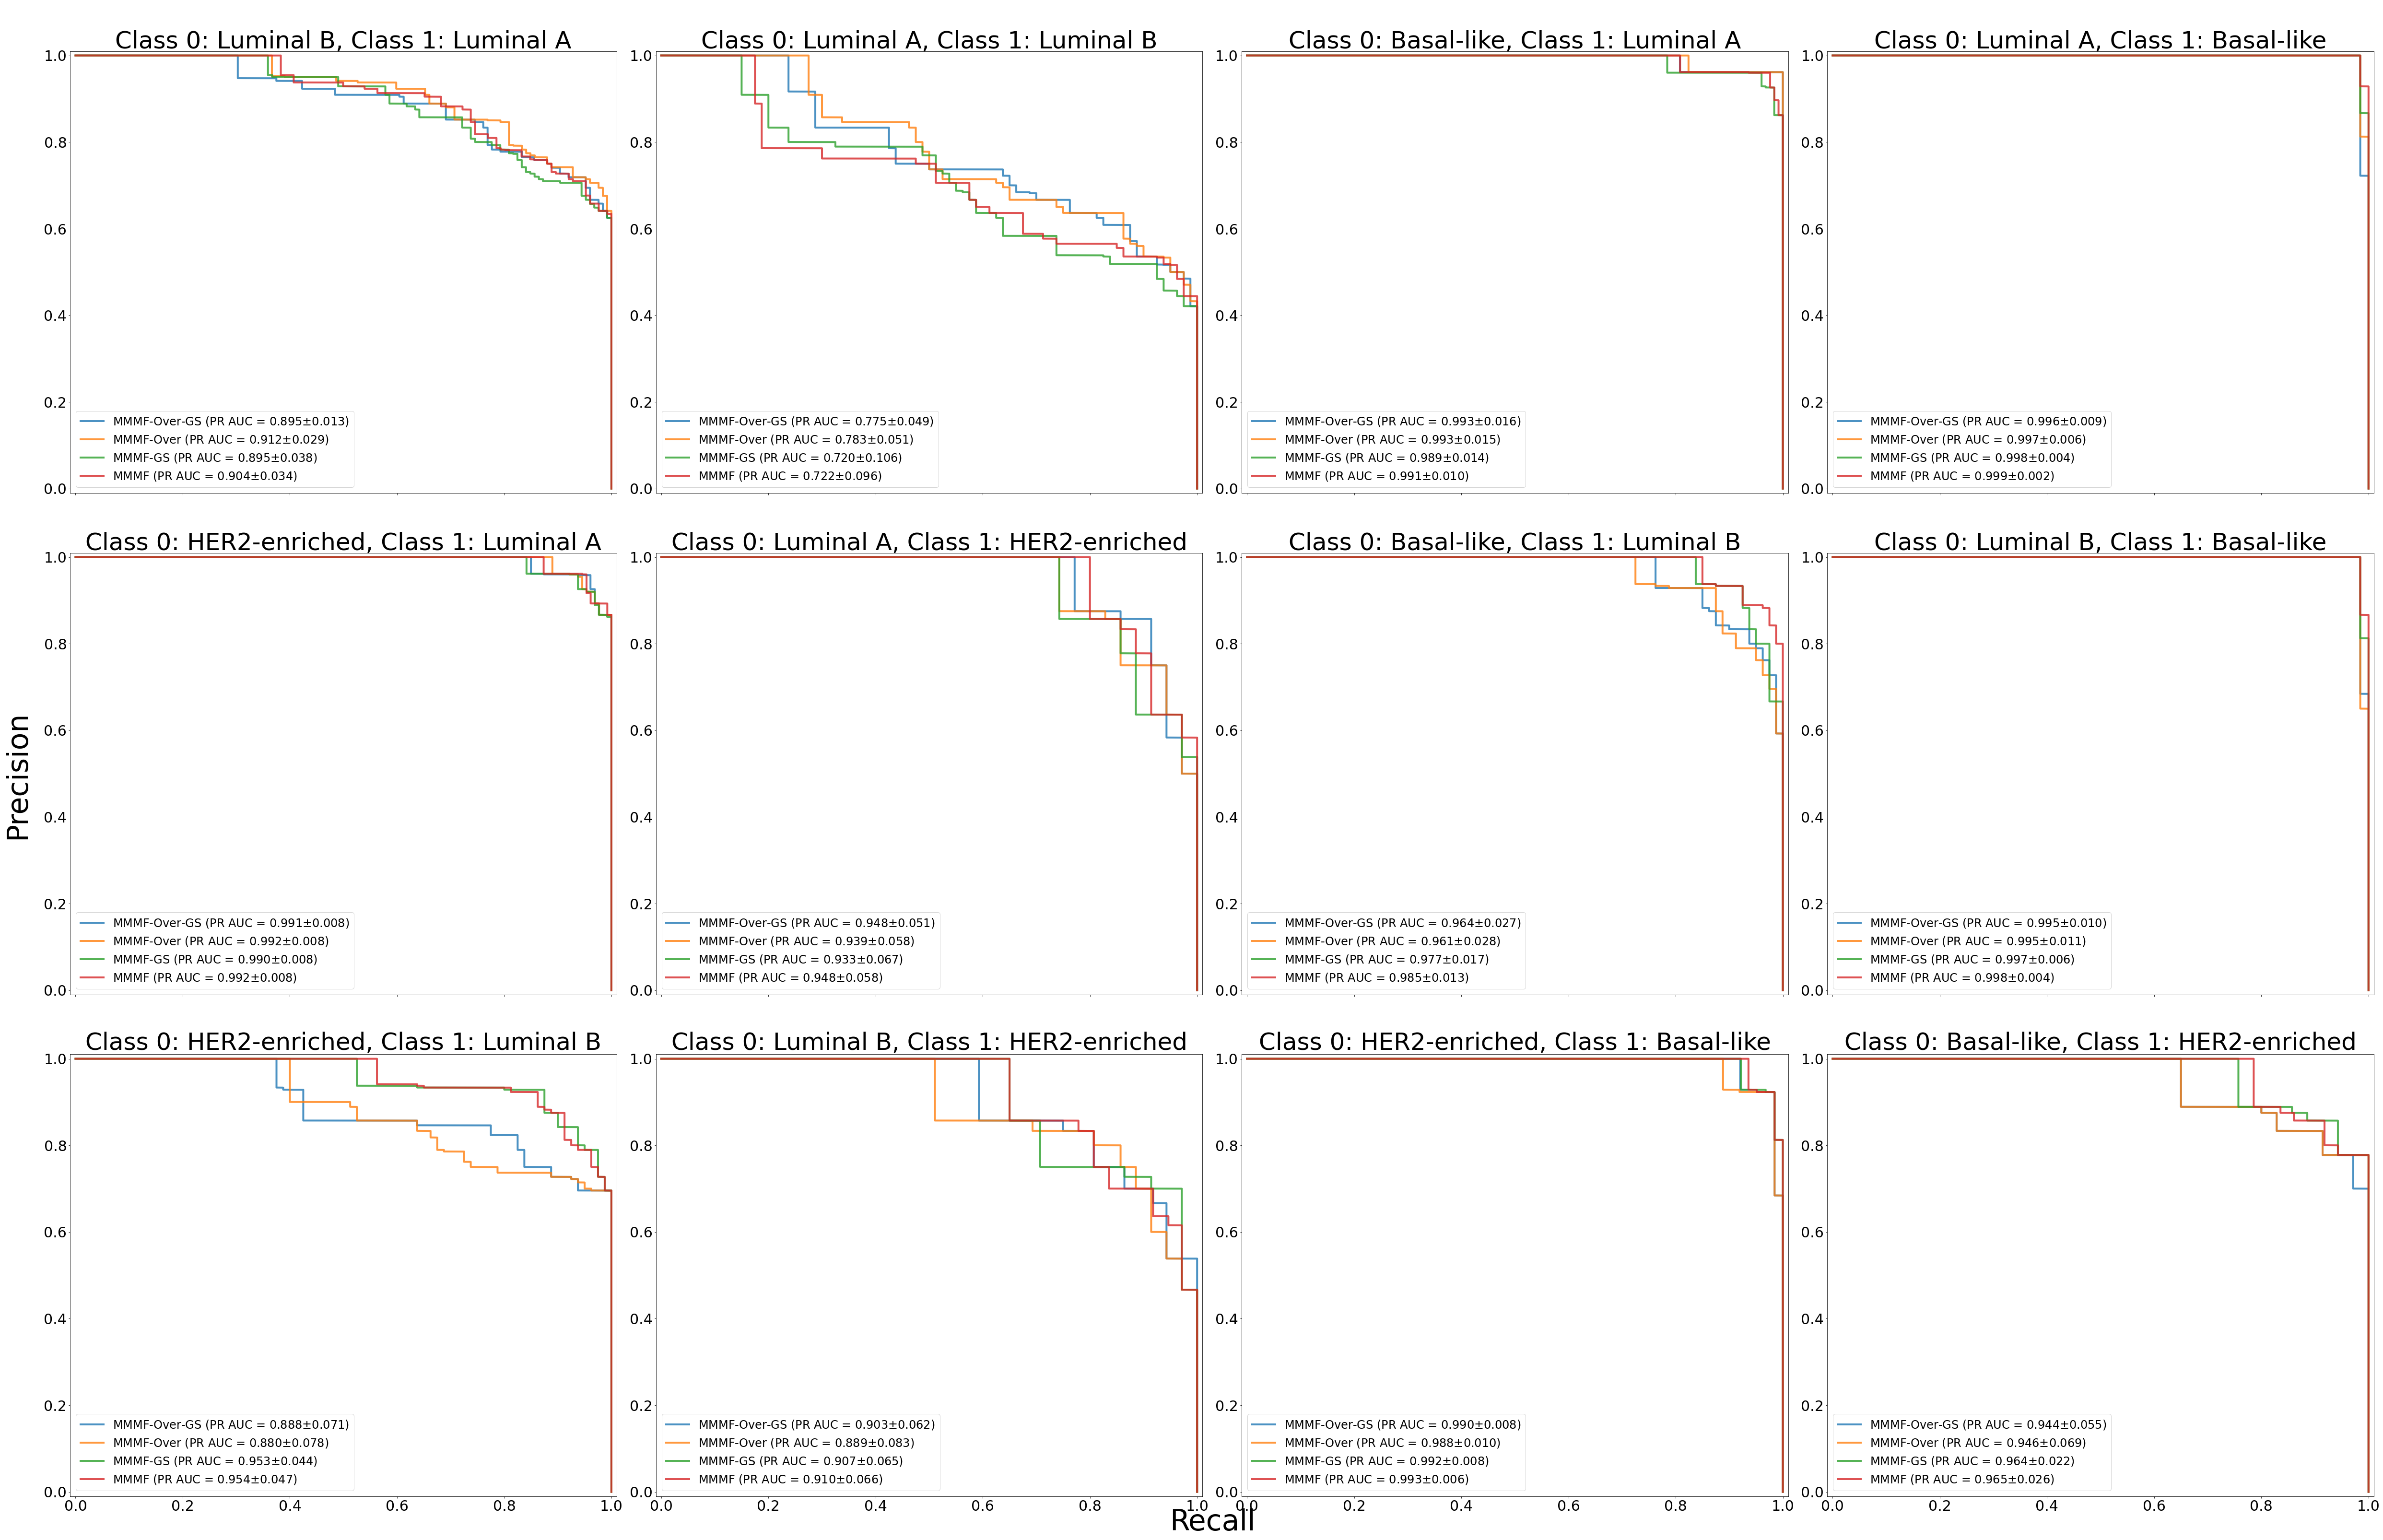

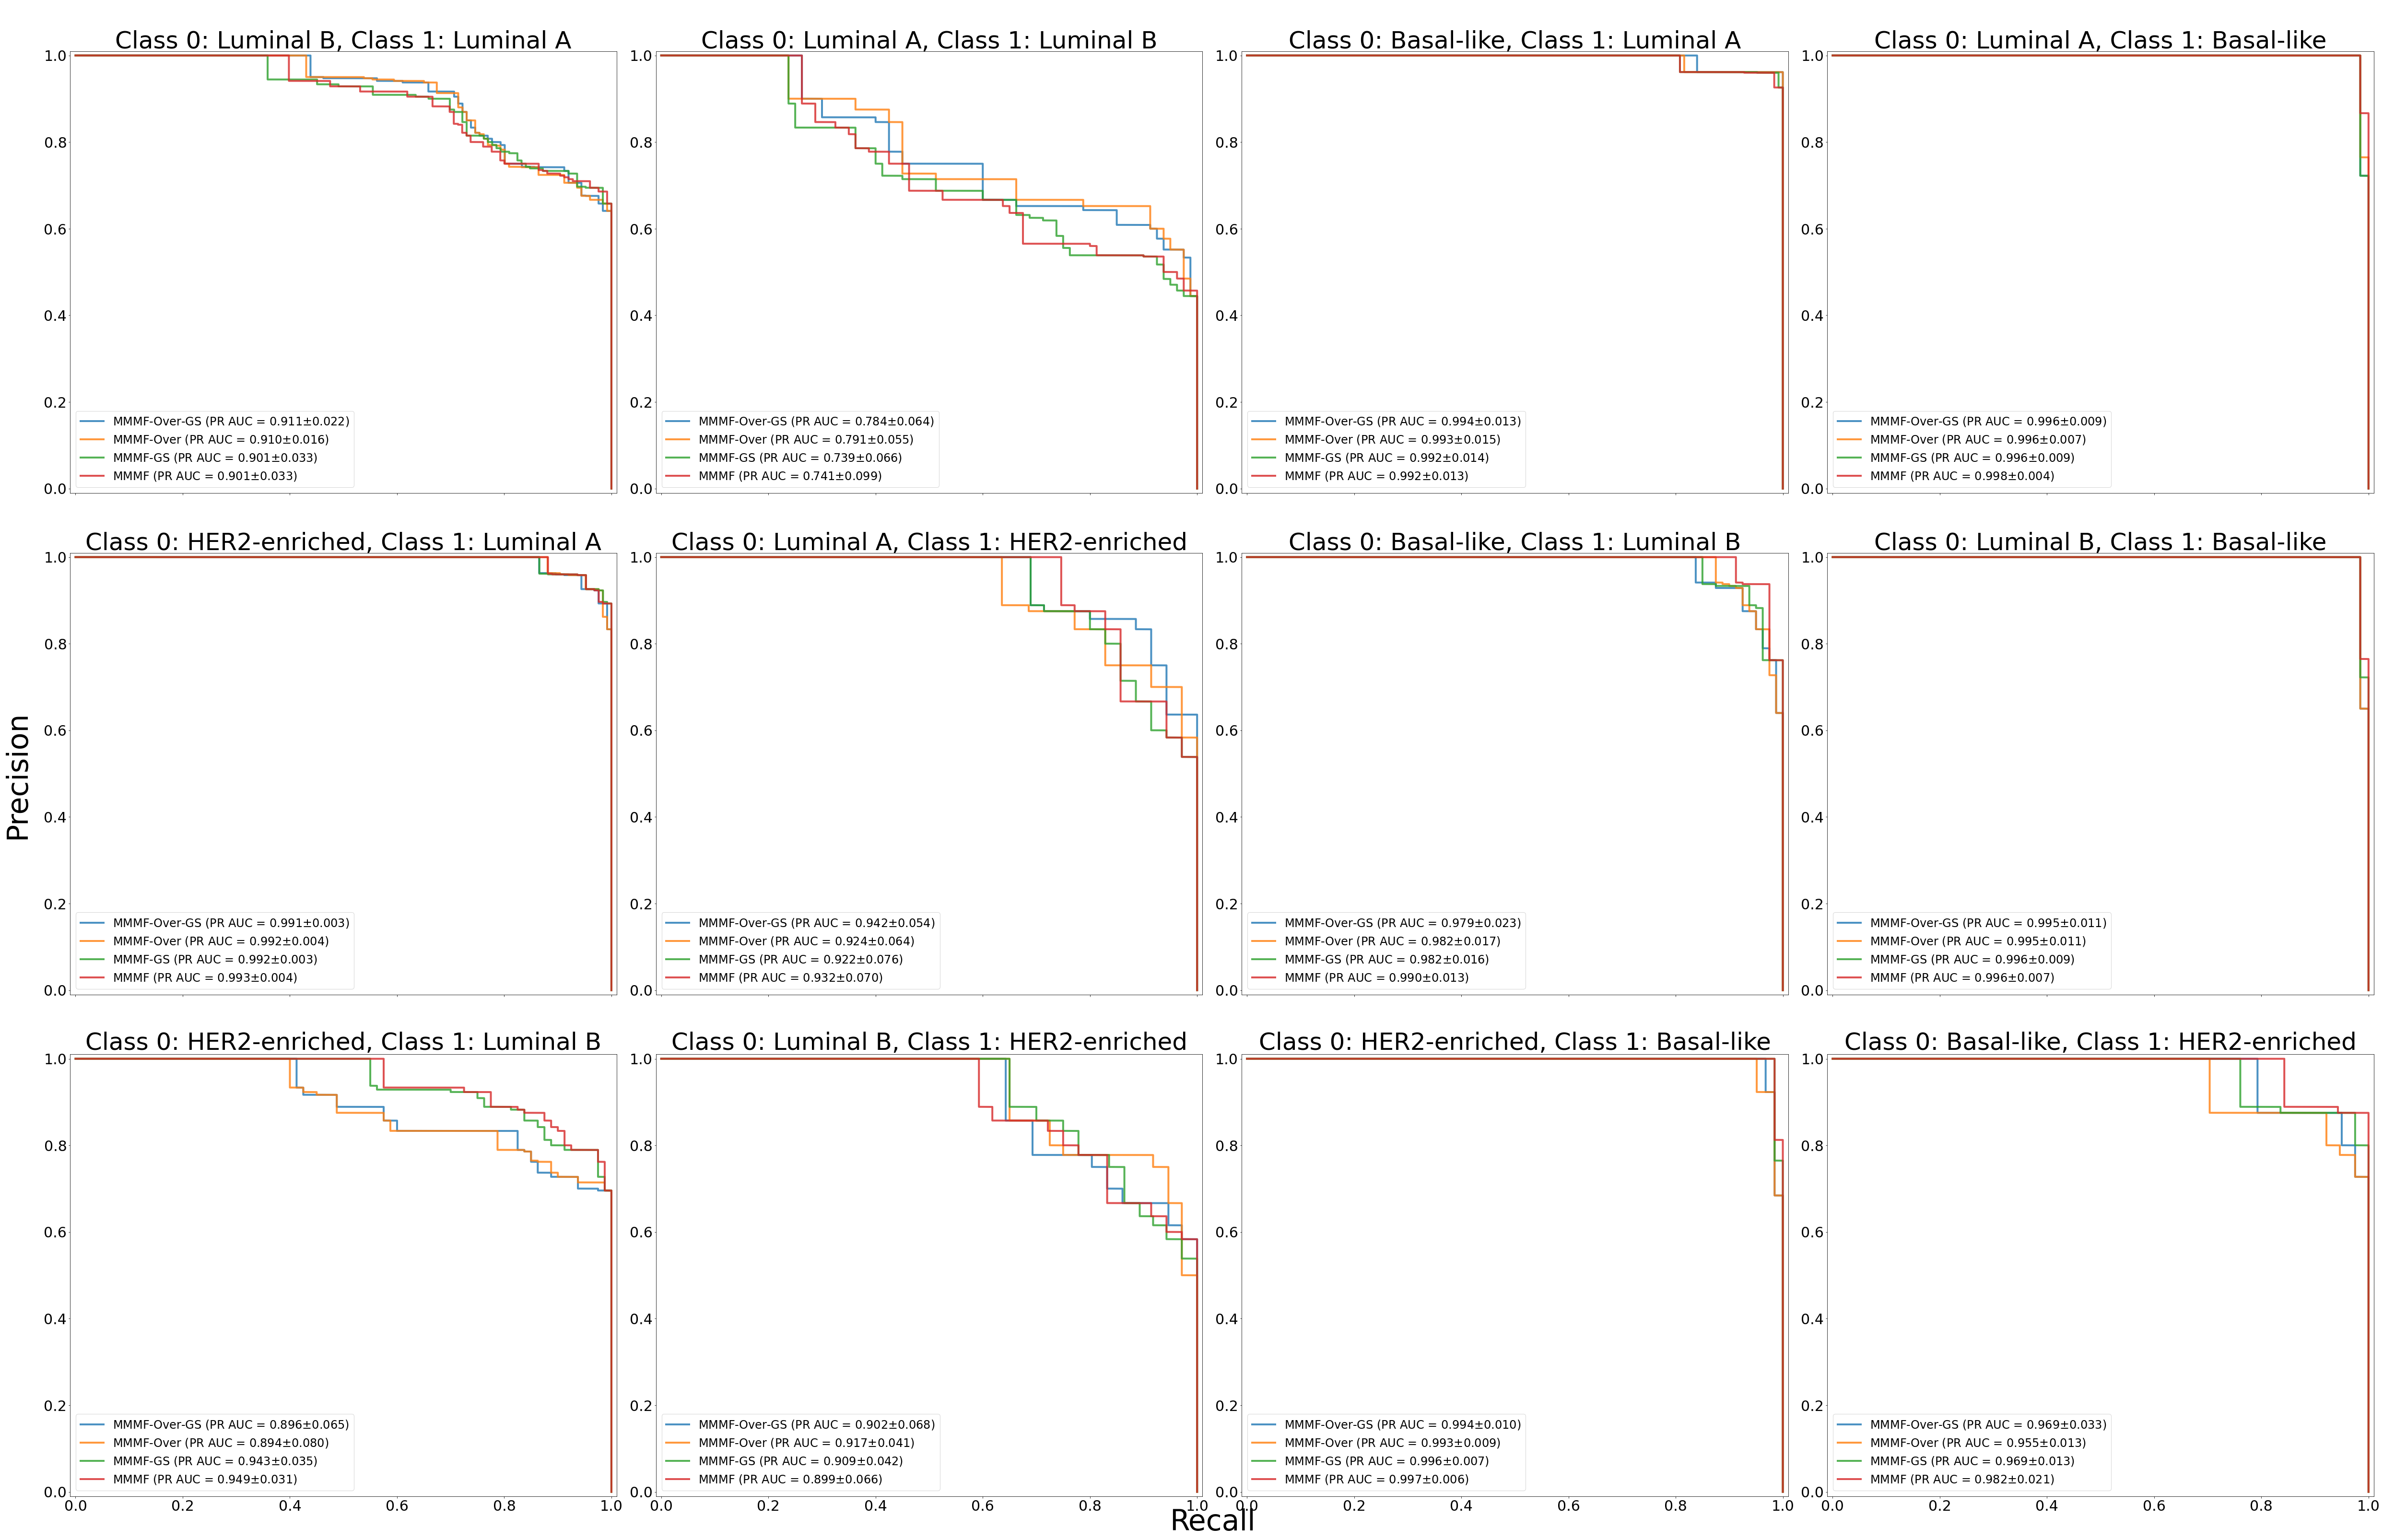

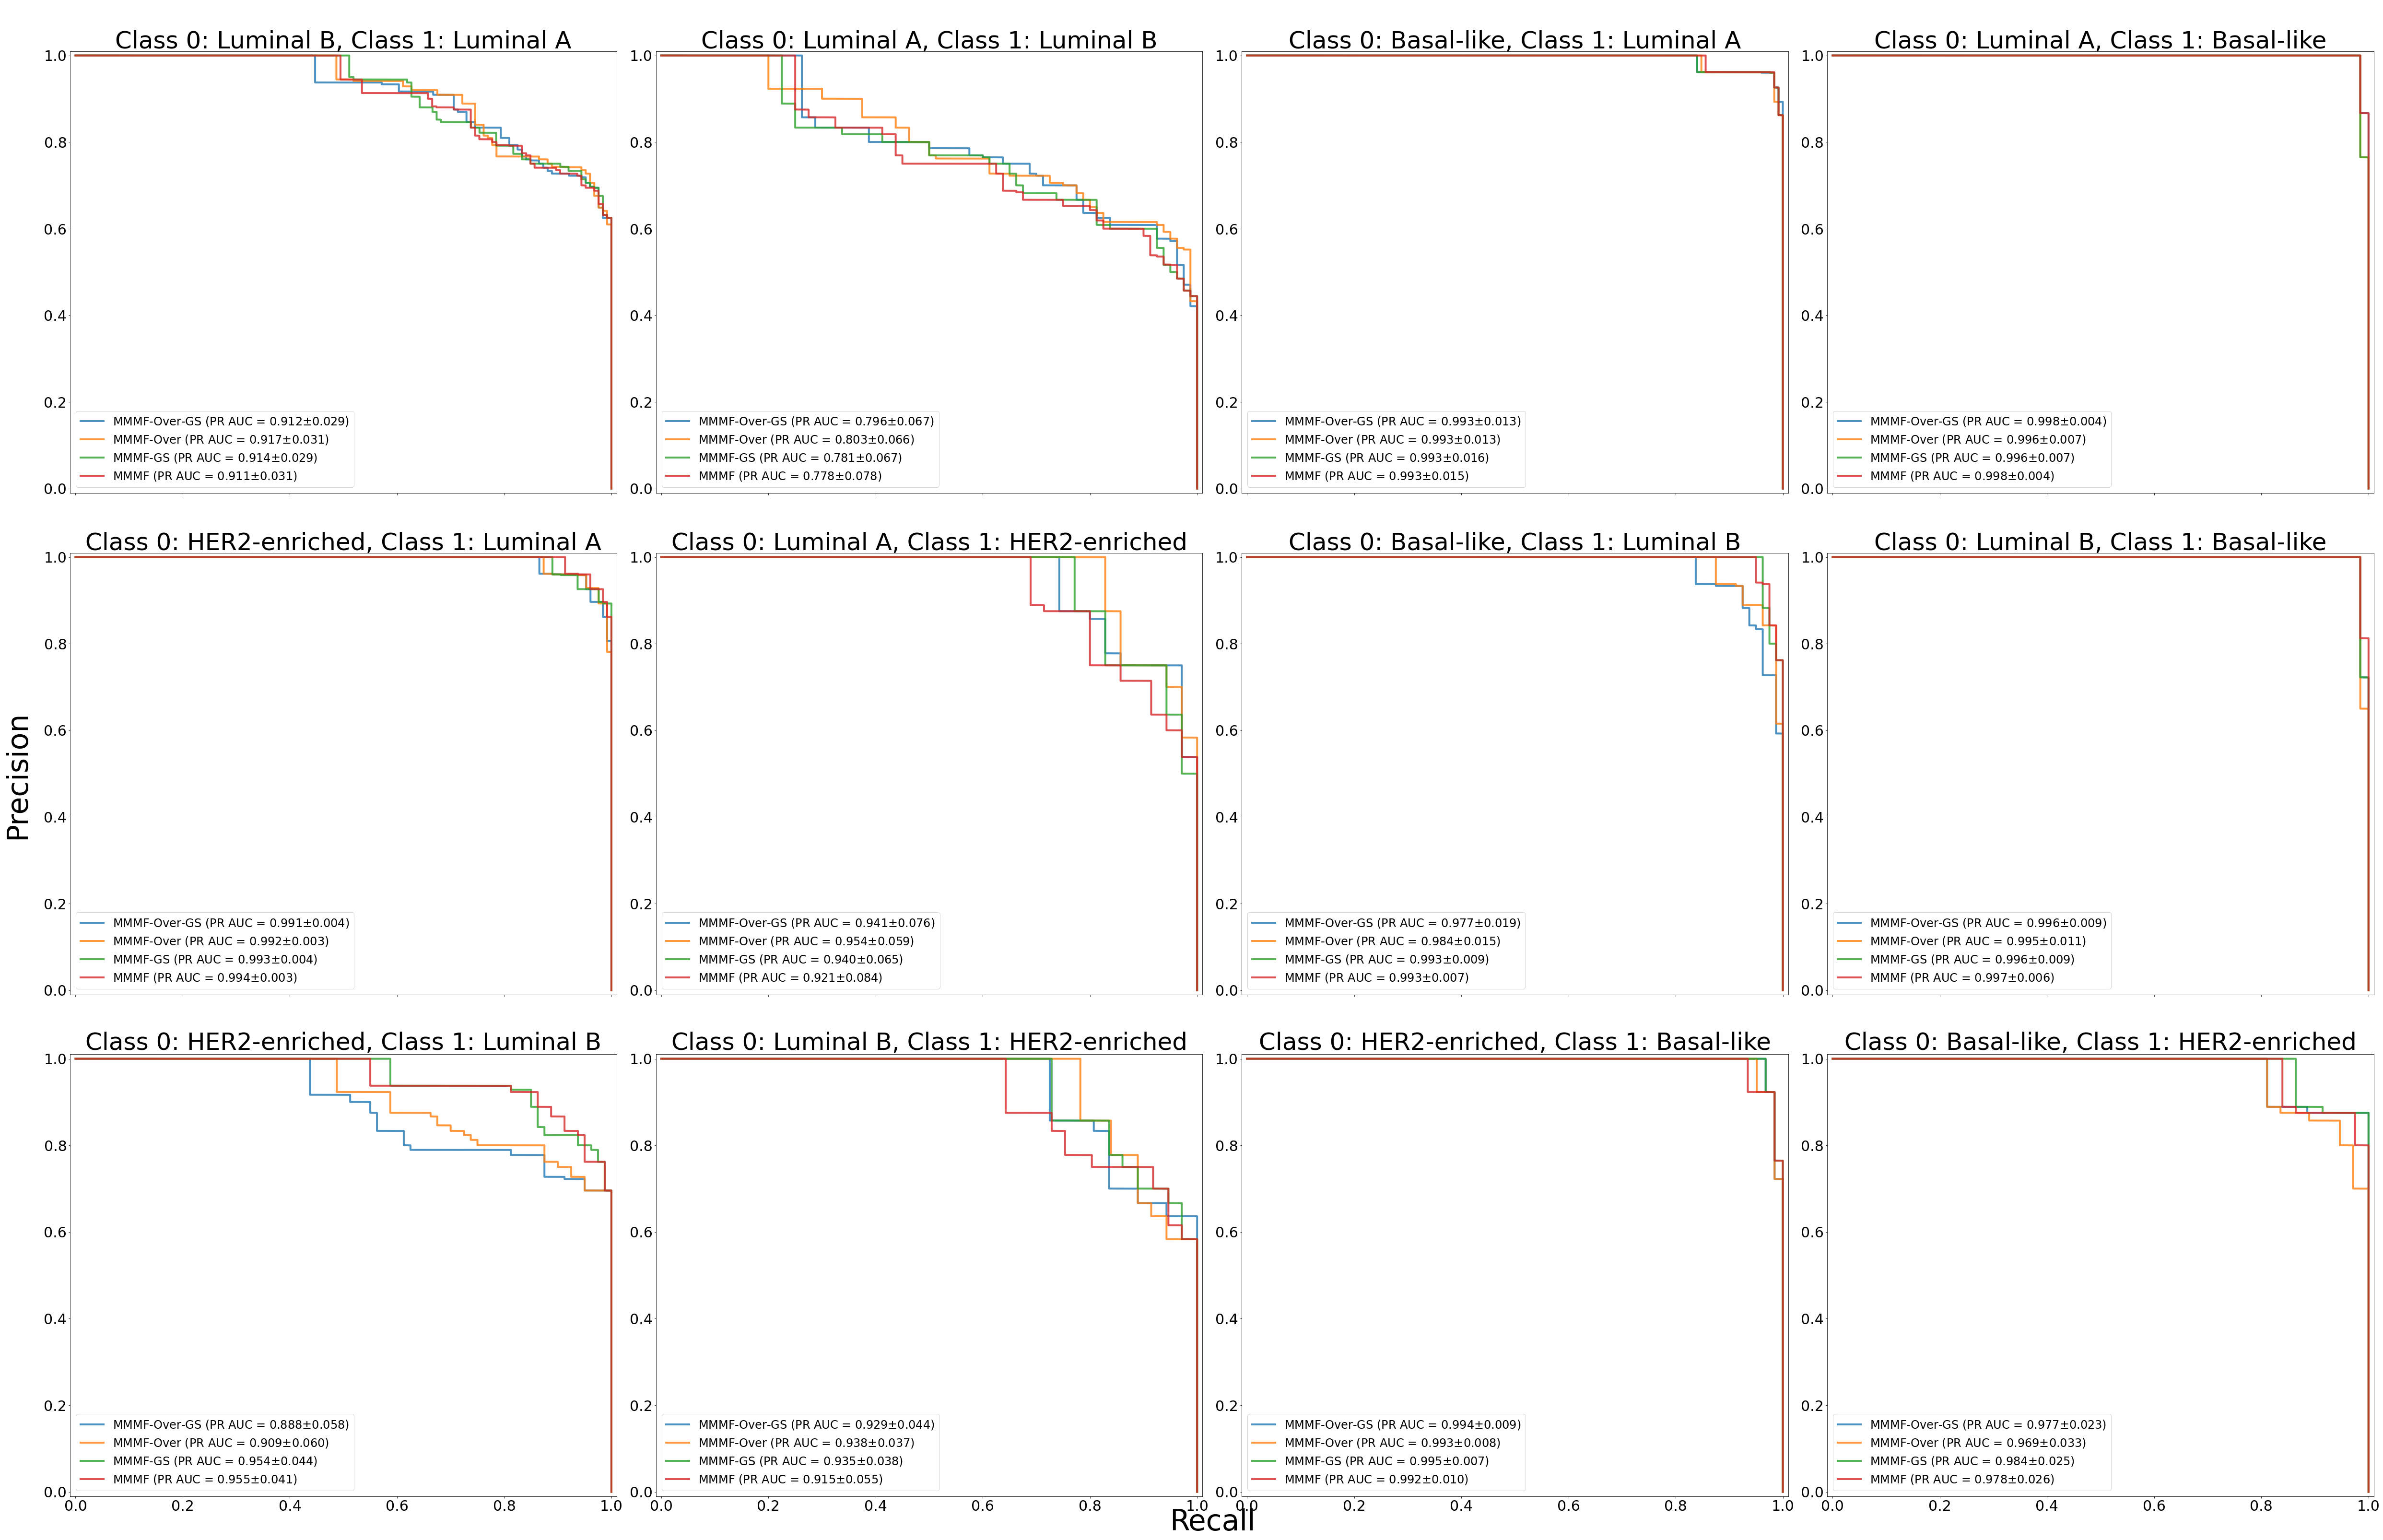

In [6]:
classes_combinations = []
class_list = [0, 1, 2, 3]
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])
        
data_type = 'BRCA'

for mp in mp_list:
    fig, axes = plt.subplots(3, 4, sharex=True, figsize = (68, 45))
    
    for i, comb in enumerate(classes_combinations):
        c1 = comb[0]
        c2 = comb[1]
    
        ax = plt.subplot(3,4,i+1)
        classification_pr_curve_plot2(ax, data_type, mp, model_list, c1, c2)
    
    fig.supxlabel('Recall',fontsize=60)
    fig.text(-0.015, 0.5, 'Precision', va='center', rotation='vertical',fontsize=60)
    fig.tight_layout()